# Highradius - Tech Track

## <u> AI-Enabled FinTech B2B Invoice Management Application </u>

In [1]:
#importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:\\Users\Anurag Sen\Dropbox\My PC (DESKTOP-GF63A20)\Desktop\Highradius_Internship\H2HBABBA2665.csv")
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200230690,DECA corporation,2019-12-16 00:00:00,2019.0,1.930213e+09,2019-12-03,20191203,20191203,20191224.0,USD,RV,1.0,NaN,23569.28,20191201.0,NAM4,1.930213e+09,0
1,U001,0200780383,MEIJ associates,2019-03-29 00:00:00,2019.0,1.928959e+09,2019-03-14,20190313,20190314,20190329.0,USD,RV,1.0,NaN,136166.48,20190314.0,NAA8,1.928959e+09,0
2,U001,0200759878,SA associates,2019-10-22 00:00:00,2019.0,1.929962e+09,2019-10-05,20191004,20191005,20191020.0,USD,RV,1.0,NaN,20342.97,20191005.0,NAH4,1.929962e+09,0
3,U001,0200769623,WAL-MAR corp,2019-05-06 00:00:00,2019.0,1.929205e+09,2019-04-25,20190424,20190425,20190510.0,USD,RV,1.0,NaN,1898.20,20190425.0,NAH4,1.929205e+09,0
4,U001,0200748108,KROGER foundation,2019-12-30 00:00:00,2019.0,1.930280e+09,2019-12-13,20191213,20191213,20191228.0,USD,RV,1.0,NaN,143605.97,20191213.0,NAA8,1.930280e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR,2020-03-06 00:00:00,2020.0,1.930563e+09,2020-02-25,20200224,20200225,20200311.0,USD,RV,1.0,NaN,22615.56,20200225.0,NAH4,1.930563e+09,0
49996,U001,0200780383,MEIJ corporation,2019-12-04 00:00:00,2019.0,1.929879e+09,2019-09-16,20190916,20190916,20191120.0,USD,RV,1.0,NaN,967.26,20190916.0,NAGD,1.929879e+09,0
49997,U001,0200769369,DI associates,2019-06-05 00:00:00,2019.0,1.929347e+09,2019-05-21,20190520,20190521,20190605.0,USD,RV,1.0,NaN,59919.04,20190521.0,NAA8,1.929347e+09,0
49998,U001,0200592182,DECA llc,NaN,2020.0,1.930790e+09,2020-04-16,20200416,20200416,20200424.0,USD,RV,1.0,NaN,33.24,20200401.0,NAM4,1.930790e+09,1


## <u> Data Pre-Processing</u> 

In [3]:
df.columns  

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [4]:
print("Feature_set size:",len(df.columns))

Feature_set size: 19


In [5]:
df.info()   #data-types and non-null_count in each series/column.     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [6]:
#thus, area_business series is a null-column

In [7]:
df.drop('area_business', axis=1, inplace=True)

In [8]:
#converting float dates to integer dates before date-time conversion

df['due_in_date'] = df['due_in_date'].astype('int')
df['baseline_create_date'] = df['baseline_create_date'].astype('int')
df['buisness_year'] = df['buisness_year'].astype('int')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  int32  
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  int32  
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  total_open_amount       50000 non-null  float64
 14  baseline_create_date    50000 non-null

In [10]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200230690,DECA corporation,2019-12-16 00:00:00,2019,1.930213e+09,2019-12-03,20191203,20191203,20191224,USD,RV,1.0,23569.28,20191201,NAM4,1.930213e+09,0
1,U001,0200780383,MEIJ associates,2019-03-29 00:00:00,2019,1.928959e+09,2019-03-14,20190313,20190314,20190329,USD,RV,1.0,136166.48,20190314,NAA8,1.928959e+09,0
2,U001,0200759878,SA associates,2019-10-22 00:00:00,2019,1.929962e+09,2019-10-05,20191004,20191005,20191020,USD,RV,1.0,20342.97,20191005,NAH4,1.929962e+09,0
3,U001,0200769623,WAL-MAR corp,2019-05-06 00:00:00,2019,1.929205e+09,2019-04-25,20190424,20190425,20190510,USD,RV,1.0,1898.20,20190425,NAH4,1.929205e+09,0
4,U001,0200748108,KROGER foundation,2019-12-30 00:00:00,2019,1.930280e+09,2019-12-13,20191213,20191213,20191228,USD,RV,1.0,143605.97,20191213,NAA8,1.930280e+09,0


## <u>Date-time conversion & Deriving the Target variable 'Delay'</u>

In [11]:
#integer dates conversion to date-time entities

df['clear_date'] = pd.to_datetime(df['clear_date'], format='%Y-%m-%d')
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d', errors='ignore')
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d', errors='ignore')
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d', errors='ignore')
df['posting_date'] = df['posting_date'].apply(pd.to_datetime)
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d', errors='ignore')

df.head(20)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200230690,DECA corporation,2019-12-16,2019,1.930213e+09,2019-12-03,2019-12-03,2019-12-03,2019-12-24,USD,RV,1.0,23569.28,2019-12-01,NAM4,1.930213e+09,0
1,U001,0200780383,MEIJ associates,2019-03-29,2019,1.928959e+09,2019-03-14,2019-03-13,2019-03-14,2019-03-29,USD,RV,1.0,136166.48,2019-03-14,NAA8,1.928959e+09,0
2,U001,0200759878,SA associates,2019-10-22,2019,1.929962e+09,2019-10-05,2019-10-04,2019-10-05,2019-10-20,USD,RV,1.0,20342.97,2019-10-05,NAH4,1.929962e+09,0
3,U001,0200769623,WAL-MAR corp,2019-05-06,2019,1.929205e+09,2019-04-25,2019-04-24,2019-04-25,2019-05-10,USD,RV,1.0,1898.20,2019-04-25,NAH4,1.929205e+09,0
4,U001,0200748108,KROGER foundation,2019-12-30,2019,1.930280e+09,2019-12-13,2019-12-13,2019-12-13,2019-12-28,USD,RV,1.0,143605.97,2019-12-13,NAA8,1.930280e+09,0
5,U001,0200769623,WAL-MAR in,NaT,2020,1.930800e+09,2020-04-18,2020-04-18,2020-04-18,2020-05-03,USD,RV,1.0,37113.61,2020-04-18,NAH4,1.930800e+09,1
6,U001,0200769623,WAL-MAR,NaT,2020,1.930752e+09,2020-04-07,2020-04-06,2020-04-07,2020-04-22,USD,RV,1.0,3975.96,2020-04-07,NAH4,1.930752e+09,1
7,U001,0200058206,GREAT,2019-10-08,2019,1.929941e+09,2019-09-30,2019-09-30,2019-09-30,2019-10-10,USD,RV,1.0,60297.18,2019-09-30,NA10,1.929941e+09,0
8,U001,0200769623,WAL-MAR,2020-03-10,2020,1.930553e+09,2020-02-22,2020-02-21,2020-02-22,2020-03-08,USD,RV,1.0,8388.66,2020-02-22,NAH4,1.930553e+09,0
9,U001,0200769623,WAL-MAR us,2020-01-28,2020,1.930410e+09,2020-01-18,2020-01-17,2020-01-18,2020-02-02,USD,RV,1.0,42195.75,2020-01-18,NAH4,1.930410e+09,0


In [12]:
#defining the target variable 'Delay', which is the difference between Clear date and the Due in Date
df['delay'] = df['clear_date'] - df['due_in_date']
df['delay'] = df['delay'].dt.days

In [13]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200230690,DECA corporation,2019-12-16,2019,1.930213e+09,2019-12-03,2019-12-03,2019-12-03,2019-12-24,USD,RV,1.0,23569.28,2019-12-01,NAM4,1.930213e+09,0,-8.0
1,U001,0200780383,MEIJ associates,2019-03-29,2019,1.928959e+09,2019-03-14,2019-03-13,2019-03-14,2019-03-29,USD,RV,1.0,136166.48,2019-03-14,NAA8,1.928959e+09,0,0.0
2,U001,0200759878,SA associates,2019-10-22,2019,1.929962e+09,2019-10-05,2019-10-04,2019-10-05,2019-10-20,USD,RV,1.0,20342.97,2019-10-05,NAH4,1.929962e+09,0,2.0
3,U001,0200769623,WAL-MAR corp,2019-05-06,2019,1.929205e+09,2019-04-25,2019-04-24,2019-04-25,2019-05-10,USD,RV,1.0,1898.20,2019-04-25,NAH4,1.929205e+09,0,-4.0
4,U001,0200748108,KROGER foundation,2019-12-30,2019,1.930280e+09,2019-12-13,2019-12-13,2019-12-13,2019-12-28,USD,RV,1.0,143605.97,2019-12-13,NAA8,1.930280e+09,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR,2020-03-06,2020,1.930563e+09,2020-02-25,2020-02-24,2020-02-25,2020-03-11,USD,RV,1.0,22615.56,2020-02-25,NAH4,1.930563e+09,0,-5.0
49996,U001,0200780383,MEIJ corporation,2019-12-04,2019,1.929879e+09,2019-09-16,2019-09-16,2019-09-16,2019-11-20,USD,RV,1.0,967.26,2019-09-16,NAGD,1.929879e+09,0,14.0
49997,U001,0200769369,DI associates,2019-06-05,2019,1.929347e+09,2019-05-21,2019-05-20,2019-05-21,2019-06-05,USD,RV,1.0,59919.04,2019-05-21,NAA8,1.929347e+09,0,0.0
49998,U001,0200592182,DECA llc,NaT,2020,1.930790e+09,2020-04-16,2020-04-16,2020-04-16,2020-04-24,USD,RV,1.0,33.24,2020-04-01,NAM4,1.930790e+09,1,NaN


## <u>Dropping Duplicates </u> 

In [14]:
#checking the number of duplicates present in the data
df.duplicated().sum()

1182

In [15]:
#dropping duplicate elements from the data
df_new = df.drop_duplicates(keep=False)  

In [16]:
df_new.shape

(47651, 19)

In [17]:
df_new = df_new.drop_duplicates(subset="invoice_id") #dropping duplicated invoice ids

In [18]:
df_new.shape

(47645, 19)

In [19]:
df_new = df_new.drop_duplicates(subset="doc_id") #dropping duplicated doc ids

In [20]:
df_new.shape

(47645, 19)

## <u>Dropping Null values</u> 

In [21]:
#slicing out all the Null values of the 'clear_date' series into a different dataframe
df_null = df_new[df_new["clear_date"].isnull()]
df_null

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
5,U001,0200769623,WAL-MAR in,NaT,2020,1.930800e+09,2020-04-18,2020-04-18,2020-04-18,2020-05-03,USD,RV,1.0,37113.61,2020-04-18,NAH4,1.930800e+09,1,NaN
6,U001,0200769623,WAL-MAR,NaT,2020,1.930752e+09,2020-04-07,2020-04-06,2020-04-07,2020-04-22,USD,RV,1.0,3975.96,2020-04-07,NAH4,1.930752e+09,1,NaN
17,U001,0200759878,SA corp,NaT,2020,1.930848e+09,2020-05-03,2020-05-02,2020-05-03,2020-05-18,USD,RV,1.0,36682.71,2020-05-03,NAH4,1.930848e+09,1,NaN
31,U001,0200712187,SPAR foundation,NaT,2020,1.930875e+09,2020-05-07,2020-05-07,2020-05-07,2020-05-22,USD,RV,1.0,50396.12,2020-05-07,NAA8,1.930875e+09,1,NaN
36,U001,0200744019,TARG,NaT,2020,1.930822e+09,2020-04-25,2020-04-24,2020-04-25,2020-05-10,USD,RV,1.0,17986.66,2020-04-25,NAA8,1.930822e+09,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49944,U001,0200759878,SA us,NaT,2020,1.930690e+09,2020-03-26,2020-03-23,2020-03-26,2020-04-10,USD,RV,1.0,29634.17,2020-03-26,NAH4,1.930690e+09,1,NaN
49945,U001,0200769623,WAL-MAR us,NaT,2020,1.930753e+09,2020-04-07,2020-04-06,2020-04-07,2020-04-22,USD,RV,1.0,24147.92,2020-04-07,NAH4,1.930753e+09,1,NaN
49949,U001,0200749782,KROG corporation,NaT,2020,1.930828e+09,2020-04-27,2020-04-25,2020-04-27,2020-05-12,USD,RV,1.0,14200.49,2020-04-27,NAA8,1.930828e+09,1,NaN
49960,U001,0200772670,ASSOCIAT foundation,NaT,2020,1.930768e+09,2020-04-08,2020-04-08,2020-04-08,2020-04-23,USD,RV,1.0,2643.14,2020-04-08,NAU5,1.930768e+09,1,NaN


In [22]:
df_null.shape

(9372, 19)

In [23]:
#filtering the main dataframe off the null 'clear_date' observations
df_new = df_new.dropna(axis=0, how="any", thresh=None, subset=['clear_date'], inplace=False)

In [24]:
df_new.shape

(38273, 19)

In [25]:
df_new.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200230690,DECA corporation,2019-12-16,2019,1.930213e+09,2019-12-03,2019-12-03,2019-12-03,2019-12-24,USD,RV,1.0,23569.28,2019-12-01,NAM4,1.930213e+09,0,-8.0
1,U001,0200780383,MEIJ associates,2019-03-29,2019,1.928959e+09,2019-03-14,2019-03-13,2019-03-14,2019-03-29,USD,RV,1.0,136166.48,2019-03-14,NAA8,1.928959e+09,0,0.0
2,U001,0200759878,SA associates,2019-10-22,2019,1.929962e+09,2019-10-05,2019-10-04,2019-10-05,2019-10-20,USD,RV,1.0,20342.97,2019-10-05,NAH4,1.929962e+09,0,2.0
3,U001,0200769623,WAL-MAR corp,2019-05-06,2019,1.929205e+09,2019-04-25,2019-04-24,2019-04-25,2019-05-10,USD,RV,1.0,1898.20,2019-04-25,NAH4,1.929205e+09,0,-4.0
7,U001,0200058206,GREAT,2019-10-08,2019,1.929941e+09,2019-09-30,2019-09-30,2019-09-30,2019-10-10,USD,RV,1.0,60297.18,2019-09-30,NA10,1.929941e+09,0,-2.0


In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38273 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           38273 non-null  object        
 1   cust_number             38273 non-null  object        
 2   name_customer           38273 non-null  object        
 3   clear_date              38273 non-null  datetime64[ns]
 4   buisness_year           38273 non-null  int32         
 5   doc_id                  38273 non-null  float64       
 6   posting_date            38273 non-null  datetime64[ns]
 7   document_create_date    38273 non-null  datetime64[ns]
 8   document_create_date.1  38273 non-null  datetime64[ns]
 9   due_in_date             38273 non-null  datetime64[ns]
 10  invoice_currency        38273 non-null  object        
 11  document type           38273 non-null  object        
 12  posting_id              38273 non-null  float6

In [27]:
#so, we observed that there is a null value present in 'invoice_id' series
df_new = df_new.dropna(axis=0, how="any", thresh=None, subset=['invoice_id'], inplace=False)

In [28]:
# df_new['delay'] = df_new['delay'].astype('int')

In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38272 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           38272 non-null  object        
 1   cust_number             38272 non-null  object        
 2   name_customer           38272 non-null  object        
 3   clear_date              38272 non-null  datetime64[ns]
 4   buisness_year           38272 non-null  int32         
 5   doc_id                  38272 non-null  float64       
 6   posting_date            38272 non-null  datetime64[ns]
 7   document_create_date    38272 non-null  datetime64[ns]
 8   document_create_date.1  38272 non-null  datetime64[ns]
 9   due_in_date             38272 non-null  datetime64[ns]
 10  invoice_currency        38272 non-null  object        
 11  document type           38272 non-null  object        
 12  posting_id              38272 non-null  float6

In [30]:
df_new = df_new.reset_index()
df_new.drop(['index'],axis=1,inplace=True)

In [31]:
df_new['invoice_currency'].unique()

array(['USD', 'CAD'], dtype=object)

In [32]:
#Converting CAD to USD (1 CAD = 0.81 USD) for data uniformity and dropping the 'invoice_currency'

CAD_index = []
for i in range(0,len(df_new)):
    if df_new['invoice_currency'][i] == 'CAD':
        CAD_index.append(i)
for j in CAD_index:
    df_new['total_open_amount'][j] = df_new['total_open_amount'][j]*0.81
    
df_new.drop(['invoice_currency'],axis=1,inplace=True)


In [33]:
df_new

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200230690,DECA corporation,2019-12-16,2019,1.930213e+09,2019-12-03,2019-12-03,2019-12-03,2019-12-24,RV,1.0,23569.28,2019-12-01,NAM4,1.930213e+09,0,-8.0
1,U001,0200780383,MEIJ associates,2019-03-29,2019,1.928959e+09,2019-03-14,2019-03-13,2019-03-14,2019-03-29,RV,1.0,136166.48,2019-03-14,NAA8,1.928959e+09,0,0.0
2,U001,0200759878,SA associates,2019-10-22,2019,1.929962e+09,2019-10-05,2019-10-04,2019-10-05,2019-10-20,RV,1.0,20342.97,2019-10-05,NAH4,1.929962e+09,0,2.0
3,U001,0200769623,WAL-MAR corp,2019-05-06,2019,1.929205e+09,2019-04-25,2019-04-24,2019-04-25,2019-05-10,RV,1.0,1898.20,2019-04-25,NAH4,1.929205e+09,0,-4.0
4,U001,0200058206,GREAT,2019-10-08,2019,1.929941e+09,2019-09-30,2019-09-30,2019-09-30,2019-10-10,RV,1.0,60297.18,2019-09-30,NA10,1.929941e+09,0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38267,U001,0200794332,COST,2019-04-05,2019,1.929002e+09,2019-03-22,2019-03-21,2019-03-22,2019-04-06,RV,1.0,1529.60,2019-03-22,NAAX,1.929002e+09,0,-1.0
38268,U001,0200769623,WAL-MAR,2020-03-06,2020,1.930563e+09,2020-02-25,2020-02-24,2020-02-25,2020-03-11,RV,1.0,22615.56,2020-02-25,NAH4,1.930563e+09,0,-5.0
38269,U001,0200780383,MEIJ corporation,2019-12-04,2019,1.929879e+09,2019-09-16,2019-09-16,2019-09-16,2019-11-20,RV,1.0,967.26,2019-09-16,NAGD,1.929879e+09,0,14.0
38270,U001,0200769369,DI associates,2019-06-05,2019,1.929347e+09,2019-05-21,2019-05-20,2019-05-21,2019-06-05,RV,1.0,59919.04,2019-05-21,NAA8,1.929347e+09,0,0.0


### <u>Checking the value count of each element in every series

In [34]:
def value_count(series_name):
    print('unique_entries:\n',df_new[series_name].unique()) 
    print('value_count:\n', df_new[series_name].value_counts())

In [35]:
df_new.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'document type', 'posting_id',
       'total_open_amount', 'baseline_create_date', 'cust_payment_terms',
       'invoice_id', 'isOpen', 'delay'],
      dtype='object')

In [36]:
value_count('business_code')

unique_entries:
 ['U001' 'CA02' 'U013' 'U002' 'U005' 'U007']
value_count:
 U001    34751
CA02     2946
U013      459
U002      106
U005        9
U007        1
Name: business_code, dtype: int64


In [37]:
value_count('cust_number')

unique_entries:
 ['0200230690' '0200780383' '0200759878' ... '0200362900' '0200756811'
 '0200625175']
value_count:
 0200769623    8468
0200726979    1484
0200762301    1161
0200759878    1017
0200794332     868
              ... 
0100043944       1
100030964        1
200729828        1
0100008870       1
0200005597       1
Name: cust_number, Length: 1346, dtype: int64


In [38]:
value_count('name_customer')

unique_entries:
 ['DECA corporation' 'MEIJ associates' 'SA associates' ... 'MANU trust'
 'VIEL trust' 'DICA us']
value_count:
 WAL-MAR co             858
WAL-MAR corporation    845
WAL-MAR in             838
WAL-MAR us             835
WAL-MAR associates     832
                      ... 
KEYBRA trust             1
HT H in                  1
MARTI corporation        1
MC A in                  1
SOUTHC                   1
Name: name_customer, Length: 3820, dtype: int64


In [39]:
value_count('buisness_year')

unique_entries:
 [2019 2020]
value_count:
 2019    33138
2020     5134
Name: buisness_year, dtype: int64


In [40]:
value_count('doc_id')

unique_entries:
 [1.93021292e+09 1.92895916e+09 1.92996178e+09 ... 1.92987900e+09
 1.92934704e+09 1.99182787e+09]
value_count:
 1.929619e+09    1
1.929591e+09    1
1.928970e+09    1
1.929306e+09    1
1.929798e+09    1
               ..
1.930009e+09    1
1.929516e+09    1
1.929567e+09    1
2.960609e+09    1
1.929845e+09    1
Name: doc_id, Length: 38272, dtype: int64


In [41]:
value_count('document type')

unique_entries:
 ['RV']
value_count:
 RV    38272
Name: document type, dtype: int64


In [42]:
value_count('posting_id')

unique_entries:
 [1.]
value_count:
 1.0    38272
Name: posting_id, dtype: int64


In [43]:
value_count('cust_payment_terms')

unique_entries:
 ['NAM4' 'NAA8' 'NAH4' 'NA10' 'CA10' 'NAVE' 'NAG2' 'NA32' 'NAWP' 'NAX2'
 'NAGD' 'NAD1' 'NAAX' 'NAC6' 'NAU5' 'NAVQ' 'NAAW' 'C106' 'CA30' 'NAD8'
 'NAVF' 'NAUZ' 'NAM1' 'NAM2' 'NAD5' 'NAB1' 'NA31' 'NAWN' 'NAWU' 'NAUP'
 'NACB' 'NAVM' 'NAVL' 'NA3B' 'NA9X' 'NAVR' 'NA84' 'NA8Q' 'B052' 'NABG'
 'NA38' 'CAX2' 'CAB1' 'BR56' 'NA3F' 'NAM3' 'CA60' 'NAD4' 'NAVD' 'NAWM'
 'NATW' '90M7' 'NATM' 'NATZ' 'B112' 'NATX' 'BR12' 'NA25' 'NANC' 'NATH'
 'NAV2' 'NATU' 'NATK' 'NAUX' 'NATV' 'NACE' 'NAUW' 'NAV9']
value_count:
 NAA8    15597
NAH4    10017
CA10     2855
NAC6     1351
NAM4     1005
        ...  
NATU        1
NATM        1
NATV        1
NAUW        1
NAWM        1
Name: cust_payment_terms, Length: 68, dtype: int64


In [44]:
value_count('invoice_id')

unique_entries:
 [1.93021292e+09 1.92895916e+09 1.92996178e+09 ... 1.92987900e+09
 1.92934704e+09 1.99182787e+09]
value_count:
 1.929619e+09    1
1.929591e+09    1
1.928970e+09    1
1.929306e+09    1
1.929798e+09    1
               ..
1.930009e+09    1
1.929516e+09    1
1.929567e+09    1
2.960609e+09    1
1.929845e+09    1
Name: invoice_id, Length: 38272, dtype: int64


In [45]:
value_count('isOpen')

unique_entries:
 [0]
value_count:
 0    38272
Name: isOpen, dtype: int64


In [46]:
#Thus, 'posting_id', 'document type' and 'isOpen' are constant series, and can be dropped
#document_create_date.1 is the updated version of document_create_date, so document_create_date can be dropped
df_new.drop(['posting_id', 'document type', 'isOpen','document_create_date'],axis=1,inplace=True)

In [47]:
df_new

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,U001,0200230690,DECA corporation,2019-12-16,2019,1.930213e+09,2019-12-03,2019-12-03,2019-12-24,23569.28,2019-12-01,NAM4,1.930213e+09,-8.0
1,U001,0200780383,MEIJ associates,2019-03-29,2019,1.928959e+09,2019-03-14,2019-03-14,2019-03-29,136166.48,2019-03-14,NAA8,1.928959e+09,0.0
2,U001,0200759878,SA associates,2019-10-22,2019,1.929962e+09,2019-10-05,2019-10-05,2019-10-20,20342.97,2019-10-05,NAH4,1.929962e+09,2.0
3,U001,0200769623,WAL-MAR corp,2019-05-06,2019,1.929205e+09,2019-04-25,2019-04-25,2019-05-10,1898.20,2019-04-25,NAH4,1.929205e+09,-4.0
4,U001,0200058206,GREAT,2019-10-08,2019,1.929941e+09,2019-09-30,2019-09-30,2019-10-10,60297.18,2019-09-30,NA10,1.929941e+09,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38267,U001,0200794332,COST,2019-04-05,2019,1.929002e+09,2019-03-22,2019-03-22,2019-04-06,1529.60,2019-03-22,NAAX,1.929002e+09,-1.0
38268,U001,0200769623,WAL-MAR,2020-03-06,2020,1.930563e+09,2020-02-25,2020-02-25,2020-03-11,22615.56,2020-02-25,NAH4,1.930563e+09,-5.0
38269,U001,0200780383,MEIJ corporation,2019-12-04,2019,1.929879e+09,2019-09-16,2019-09-16,2019-11-20,967.26,2019-09-16,NAGD,1.929879e+09,14.0
38270,U001,0200769369,DI associates,2019-06-05,2019,1.929347e+09,2019-05-21,2019-05-21,2019-06-05,59919.04,2019-05-21,NAA8,1.929347e+09,0.0


In [48]:
#Arranging the data on the basis of 'baseline_create_date'
df_new = df_new.sort_values(by="baseline_create_date")
df_new.reset_index(inplace = True)
df_new.drop(['index'],axis=1,inplace=True)

In [49]:
df_new

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,CA02,0140105785,SHOPPE,2019-02-15,2019,2.960528e+09,2019-02-12,2019-02-12,2018-10-27,8558.3304,2018-10-17,CA10,2.960528e+09,111.0
1,U001,0200754118,ARMY,2019-09-25,2019,1.929921e+09,2019-09-25,2019-09-25,2018-12-31,26.2800,2018-12-16,NAM3,1.929921e+09,268.0
2,CA02,0140104429,COSTCO trust,2019-02-20,2019,2.960522e+09,2019-01-11,2019-01-11,2019-01-06,1886.6520,2018-12-27,CA10,2.960522e+09,45.0
3,U001,0200726979,BJ'S us,2019-01-15,2019,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,152.7900,2018-12-30,NAA8,1.928542e+09,1.0
4,U001,0200769623,WAL-MAR systems,2019-01-09,2019,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,22237.9800,2018-12-30,NAH4,1.928541e+09,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38267,CA02,0140105686,SYSC,2020-03-19,2020,2.960616e+09,2020-02-25,2020-02-25,2020-03-14,8104.5360,2020-03-04,CA10,2.960616e+09,5.0
38268,CA02,0140105686,SYSC,2020-03-19,2020,2.960616e+09,2020-02-25,2020-02-25,2020-03-14,53596.7766,2020-03-04,CA10,2.960616e+09,5.0
38269,CA02,0140105847,GORDON F systems,2020-03-16,2020,2.960613e+09,2020-02-25,2020-02-25,2020-03-15,15693.3288,2020-03-05,CA10,2.960613e+09,1.0
38270,U001,0200424504,M associates,2020-03-16,2020,1.930544e+09,2020-02-20,2020-02-20,2020-03-15,17429.2100,2020-03-15,NACE,1.930544e+09,1.0


## <u>Train-Validation-Test Split 

In [50]:
df_new

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,CA02,0140105785,SHOPPE,2019-02-15,2019,2.960528e+09,2019-02-12,2019-02-12,2018-10-27,8558.3304,2018-10-17,CA10,2.960528e+09,111.0
1,U001,0200754118,ARMY,2019-09-25,2019,1.929921e+09,2019-09-25,2019-09-25,2018-12-31,26.2800,2018-12-16,NAM3,1.929921e+09,268.0
2,CA02,0140104429,COSTCO trust,2019-02-20,2019,2.960522e+09,2019-01-11,2019-01-11,2019-01-06,1886.6520,2018-12-27,CA10,2.960522e+09,45.0
3,U001,0200726979,BJ'S us,2019-01-15,2019,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,152.7900,2018-12-30,NAA8,1.928542e+09,1.0
4,U001,0200769623,WAL-MAR systems,2019-01-09,2019,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,22237.9800,2018-12-30,NAH4,1.928541e+09,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38267,CA02,0140105686,SYSC,2020-03-19,2020,2.960616e+09,2020-02-25,2020-02-25,2020-03-14,8104.5360,2020-03-04,CA10,2.960616e+09,5.0
38268,CA02,0140105686,SYSC,2020-03-19,2020,2.960616e+09,2020-02-25,2020-02-25,2020-03-14,53596.7766,2020-03-04,CA10,2.960616e+09,5.0
38269,CA02,0140105847,GORDON F systems,2020-03-16,2020,2.960613e+09,2020-02-25,2020-02-25,2020-03-15,15693.3288,2020-03-05,CA10,2.960613e+09,1.0
38270,U001,0200424504,M associates,2020-03-16,2020,1.930544e+09,2020-02-20,2020-02-20,2020-03-15,17429.2100,2020-03-15,NACE,1.930544e+09,1.0


In [51]:
X = df_new.drop(['delay'],axis=1)
y = df_new['delay']

In [52]:
X

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,CA02,0140105785,SHOPPE,2019-02-15,2019,2.960528e+09,2019-02-12,2019-02-12,2018-10-27,8558.3304,2018-10-17,CA10,2.960528e+09
1,U001,0200754118,ARMY,2019-09-25,2019,1.929921e+09,2019-09-25,2019-09-25,2018-12-31,26.2800,2018-12-16,NAM3,1.929921e+09
2,CA02,0140104429,COSTCO trust,2019-02-20,2019,2.960522e+09,2019-01-11,2019-01-11,2019-01-06,1886.6520,2018-12-27,CA10,2.960522e+09
3,U001,0200726979,BJ'S us,2019-01-15,2019,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,152.7900,2018-12-30,NAA8,1.928542e+09
4,U001,0200769623,WAL-MAR systems,2019-01-09,2019,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,22237.9800,2018-12-30,NAH4,1.928541e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38267,CA02,0140105686,SYSC,2020-03-19,2020,2.960616e+09,2020-02-25,2020-02-25,2020-03-14,8104.5360,2020-03-04,CA10,2.960616e+09
38268,CA02,0140105686,SYSC,2020-03-19,2020,2.960616e+09,2020-02-25,2020-02-25,2020-03-14,53596.7766,2020-03-04,CA10,2.960616e+09
38269,CA02,0140105847,GORDON F systems,2020-03-16,2020,2.960613e+09,2020-02-25,2020-02-25,2020-03-15,15693.3288,2020-03-05,CA10,2.960613e+09
38270,U001,0200424504,M associates,2020-03-16,2020,1.930544e+09,2020-02-20,2020-02-20,2020-03-15,17429.2100,2020-03-15,NACE,1.930544e+09


In [53]:
y

0        111.0
1        268.0
2         45.0
3          1.0
4         -5.0
         ...  
38267      5.0
38268      5.0
38269      1.0
38270      1.0
38271      3.0
Name: delay, Length: 38272, dtype: float64

In [54]:
#Splitting the data to 80% Training_set, 10% Validation_set and 10% Testing_set
from sklearn.model_selection import train_test_split
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.2,random_state=0,shuffle = False)

X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=0,shuffle = False)

In [55]:
X_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,CA02,0140105785,SHOPPE,2019-02-15,2019,2.960528e+09,2019-02-12,2019-02-12,2018-10-27,8558.3304,2018-10-17,CA10,2.960528e+09
1,U001,0200754118,ARMY,2019-09-25,2019,1.929921e+09,2019-09-25,2019-09-25,2018-12-31,26.2800,2018-12-16,NAM3,1.929921e+09
2,CA02,0140104429,COSTCO trust,2019-02-20,2019,2.960522e+09,2019-01-11,2019-01-11,2019-01-06,1886.6520,2018-12-27,CA10,2.960522e+09
3,U001,0200726979,BJ'S us,2019-01-15,2019,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,152.7900,2018-12-30,NAA8,1.928542e+09
4,U001,0200769623,WAL-MAR systems,2019-01-09,2019,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,22237.9800,2018-12-30,NAH4,1.928541e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30612,U001,0200705372,FR associates,2019-12-03,2019,1.930163e+09,2019-11-18,2019-11-18,2019-12-03,56364.0000,2019-11-18,NAA8,1.930163e+09
30613,U001,0200689451,PORK,2019-12-03,2019,1.930164e+09,2019-11-18,2019-11-18,2019-12-03,108843.2900,2019-11-18,NAA8,1.930164e+09
30614,U001,0200747369,SCHNU in,2019-12-03,2019,1.930167e+09,2019-11-18,2019-11-18,2019-12-03,187057.5000,2019-11-18,NAA8,1.930167e+09
30615,U001,0200762301,C&S WH systems,2019-12-03,2019,1.930161e+09,2019-11-18,2019-11-18,2019-12-03,69364.9500,2019-11-18,NAC6,1.930161e+09


In [56]:
y_train

0        111.0
1        268.0
2         45.0
3          1.0
4         -5.0
         ...  
30612      0.0
30613      0.0
30614      0.0
30615      0.0
30616      1.0
Name: delay, Length: 30617, dtype: float64

In [57]:
X_val

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
30617,U001,0200794332,COST trust,2019-12-03,2019,1.930162e+09,2019-11-18,2019-11-18,2019-12-03,16549.84,2019-11-18,NAAX,1.930162e+09
30618,U001,0200769623,WAL-MAR llc,2019-11-29,2019,1.930162e+09,2019-11-18,2019-11-18,2019-12-03,75430.19,2019-11-18,NAH4,1.930162e+09
30619,U001,0200756072,REINHA us,2019-12-03,2019,1.930163e+09,2019-11-18,2019-11-18,2019-12-03,28557.60,2019-11-18,NAA8,1.930163e+09
30620,U001,0200769623,WAL-MAR associates,2019-12-02,2019,1.930166e+09,2019-11-18,2019-11-18,2019-12-03,63158.62,2019-11-18,NAH4,1.930166e+09
30621,U001,0200707822,PUBLI trust,2019-12-03,2019,1.930167e+09,2019-11-18,2019-11-18,2019-12-03,41450.51,2019-11-18,NAA8,1.930167e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34439,U001,0100036292,AMY corporation,2020-01-27,2020,1.930400e+09,2020-01-14,2020-01-14,2020-01-30,17878.96,2020-01-14,NA3F,1.930400e+09
34440,U001,0100047527,LIDL in,2020-01-29,2020,1.930380e+09,2020-01-14,2020-01-14,2020-01-29,1862.63,2020-01-14,NAA8,1.930380e+09
34441,U001,0200084659,KR,2020-02-04,2020,1.930396e+09,2020-01-14,2020-01-14,2020-01-29,150530.69,2020-01-14,NAA8,1.930396e+09
34442,U001,0200762301,C&S WH us,2020-01-29,2020,1.930392e+09,2020-01-14,2020-01-14,2020-01-29,45330.31,2020-01-14,NAC6,1.930392e+09


In [58]:
y_val

30617    0.0
30618   -4.0
30619    0.0
30620   -1.0
30621    0.0
        ... 
34439   -3.0
34440    0.0
34441    6.0
34442    0.0
34443    0.0
Name: delay, Length: 3827, dtype: float64

In [59]:
X_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
34444,U001,0100035971,BON foundation,2020-02-03,2020,1.930398e+09,2020-01-14,2020-01-14,2020-01-29,31016.1600,2020-01-14,NAA8,1.930398e+09
34445,U001,0200780383,MEIJ,2020-01-29,2020,1.930392e+09,2020-01-14,2020-01-14,2020-01-29,50542.9600,2020-01-14,NAA8,1.930392e+09
34446,U001,0200769623,WAL-MAR associates,2020-01-30,2020,1.930392e+09,2020-01-14,2020-01-14,2020-01-29,23787.5200,2020-01-14,NAH4,1.930392e+09
34447,U001,0200915438,GROC associates,2020-01-29,2020,1.930391e+09,2020-01-14,2020-01-14,2020-01-29,32691.1200,2020-01-14,NAA8,1.930391e+09
34448,U001,0200769623,WAL-MAR co,2020-01-27,2020,1.930396e+09,2020-01-14,2020-01-14,2020-01-29,271.0600,2020-01-14,NAH4,1.930396e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38267,CA02,0140105686,SYSC,2020-03-19,2020,2.960616e+09,2020-02-25,2020-02-25,2020-03-14,8104.5360,2020-03-04,CA10,2.960616e+09
38268,CA02,0140105686,SYSC,2020-03-19,2020,2.960616e+09,2020-02-25,2020-02-25,2020-03-14,53596.7766,2020-03-04,CA10,2.960616e+09
38269,CA02,0140105847,GORDON F systems,2020-03-16,2020,2.960613e+09,2020-02-25,2020-02-25,2020-03-15,15693.3288,2020-03-05,CA10,2.960613e+09
38270,U001,0200424504,M associates,2020-03-16,2020,1.930544e+09,2020-02-20,2020-02-20,2020-03-15,17429.2100,2020-03-15,NACE,1.930544e+09


In [60]:
y_test

34444    5.0
34445    0.0
34446    1.0
34447    0.0
34448   -2.0
        ... 
38267    5.0
38268    5.0
38269    1.0
38270    1.0
38271    3.0
Name: delay, Length: 3828, dtype: float64

In [61]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(30617, 13) (30617,)
(3827, 13) (3827,)
(3828, 13) (3828,)


In [62]:
Training_data = X_train.merge(y_train,on = X_train.index)
Validation_data = X_val.merge(y_val,on = X_val.index)
Testing_data = X_test.merge(y_test,on = X_test.index)

## <u>Exploratory-Data Analysis on Training_data 

In [63]:
X_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,CA02,0140105785,SHOPPE,2019-02-15,2019,2.960528e+09,2019-02-12,2019-02-12,2018-10-27,8558.3304,2018-10-17,CA10,2.960528e+09
1,U001,0200754118,ARMY,2019-09-25,2019,1.929921e+09,2019-09-25,2019-09-25,2018-12-31,26.2800,2018-12-16,NAM3,1.929921e+09
2,CA02,0140104429,COSTCO trust,2019-02-20,2019,2.960522e+09,2019-01-11,2019-01-11,2019-01-06,1886.6520,2018-12-27,CA10,2.960522e+09
3,U001,0200726979,BJ'S us,2019-01-15,2019,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,152.7900,2018-12-30,NAA8,1.928542e+09
4,U001,0200769623,WAL-MAR systems,2019-01-09,2019,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,22237.9800,2018-12-30,NAH4,1.928541e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30612,U001,0200705372,FR associates,2019-12-03,2019,1.930163e+09,2019-11-18,2019-11-18,2019-12-03,56364.0000,2019-11-18,NAA8,1.930163e+09
30613,U001,0200689451,PORK,2019-12-03,2019,1.930164e+09,2019-11-18,2019-11-18,2019-12-03,108843.2900,2019-11-18,NAA8,1.930164e+09
30614,U001,0200747369,SCHNU in,2019-12-03,2019,1.930167e+09,2019-11-18,2019-11-18,2019-12-03,187057.5000,2019-11-18,NAA8,1.930167e+09
30615,U001,0200762301,C&S WH systems,2019-12-03,2019,1.930161e+09,2019-11-18,2019-11-18,2019-12-03,69364.9500,2019-11-18,NAC6,1.930161e+09


In [64]:
y_train

0        111.0
1        268.0
2         45.0
3          1.0
4         -5.0
         ...  
30612      0.0
30613      0.0
30614      0.0
30615      0.0
30616      1.0
Name: delay, Length: 30617, dtype: float64

In [65]:
X_train.nunique()

business_code                 6
cust_number                1264
name_customer              3474
clear_date                  289
buisness_year                 1
doc_id                    30617
posting_date                331
document_create_date.1      331
due_in_date                 366
total_open_amount         28043
baseline_create_date        327
cust_payment_terms           62
invoice_id                30617
dtype: int64

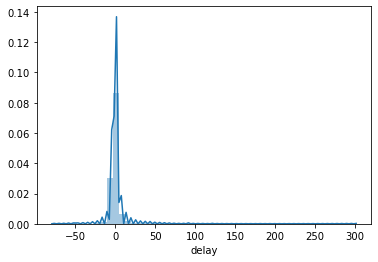

In [66]:
sns.distplot(y_train)
#The distribution has a positive tail
#Thus, right-skewed distribution
#Thus, mean, median and mode are not co-incident

Text(0, 0.5, 'Number of business_codes')

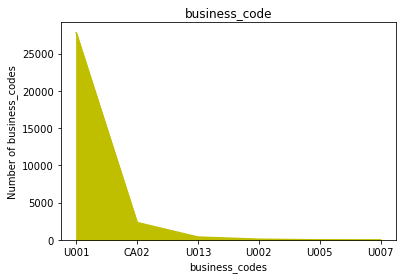

In [67]:
#area chart representation of number of business codes
fig = X_train['business_code'].value_counts().plot.area(color='y')
fig.set_title('business_code')
fig.set_xlabel('business_codes')
fig.set_ylabel('Number of business_codes')

#Observation
#U001, CA01 and U013 covers the most distribution

Text(0.5, 1.0, 'buisness_year')

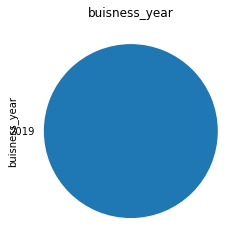

In [68]:
fig = X_train['buisness_year'].value_counts().plot.pie()
fig.set_title('buisness_year')

#Observation
#business_year is a constant column for training data thus, it can be dropped

Text(0, 0.5, 'Number of businesses')

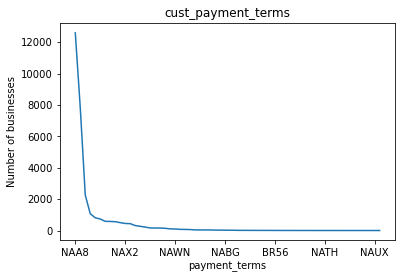

In [69]:
#line chart representation of customer_payment_terms
fig = X_train['cust_payment_terms'].value_counts().plot.line()
fig.set_title('cust_payment_terms')
fig.set_xlabel('payment_terms')
fig.set_ylabel('Number of businesses')

#Observation
#NAA8, NAX2, NAWN, NABG, BR56, B052 and B112 covers most of the distribution

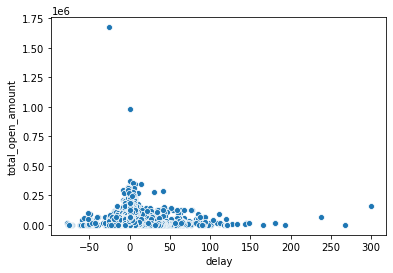

In [70]:
#Relation between delay and total_open_amount
sns.scatterplot(data=Training_data, x="delay", y="total_open_amount")

#delay and total_open_amount has no linear relation

In [71]:
X_train['business_code'].value_counts()

U001    27801
CA02     2333
U013      381
U002       93
U005        8
U007        1
Name: business_code, dtype: int64

In [72]:
business_code_priority = ['U001', 'CA02', 'U013', 'U002', 'U005', 'U007']

In [73]:
X_train['cust_number'].value_counts()

0200769623    6471
0200726979    1167
0200762301     902
0200759878     805
0200794332     657
              ... 
0200705600       1
0100054178       1
0100031969       1
0100034820       1
200093491        1
Name: cust_number, Length: 1264, dtype: int64

In [74]:
X_train['name_customer'].value_counts()

WAL-MAR co             673
WAL-MAR llc            661
WAL-MAR trust          659
WAL-MAR in             653
WAL-MAR corporation    649
                      ... 
PATIO  foundation        1
KGL FOO corp             1
CTI A foundation         1
GOLD co                  1
SOUTHC                   1
Name: name_customer, Length: 3474, dtype: int64

In [75]:
X_train['cust_payment_terms'].value_counts()

NAA8    12598
NAH4     7813
CA10     2259
NAC6     1069
NAM4      811
        ...  
NATM        1
NATU        1
NANC        1
NAUX        1
NAWM        1
Name: cust_payment_terms, Length: 62, dtype: int64

In [76]:
X_train['invoice_id'].value_counts()

1.929619e+09    1
1.929774e+09    1
1.928669e+09    1
1.929361e+09    1
2.960537e+09    1
               ..
1.929205e+09    1
1.929343e+09    1
2.960590e+09    1
1.928860e+09    1
1.929845e+09    1
Name: invoice_id, Length: 30617, dtype: int64

## <u>Feature Engineering 

In [77]:
X_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,CA02,0140105785,SHOPPE,2019-02-15,2019,2.960528e+09,2019-02-12,2019-02-12,2018-10-27,8558.3304,2018-10-17,CA10,2.960528e+09
1,U001,0200754118,ARMY,2019-09-25,2019,1.929921e+09,2019-09-25,2019-09-25,2018-12-31,26.2800,2018-12-16,NAM3,1.929921e+09
2,CA02,0140104429,COSTCO trust,2019-02-20,2019,2.960522e+09,2019-01-11,2019-01-11,2019-01-06,1886.6520,2018-12-27,CA10,2.960522e+09
3,U001,0200726979,BJ'S us,2019-01-15,2019,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,152.7900,2018-12-30,NAA8,1.928542e+09
4,U001,0200769623,WAL-MAR systems,2019-01-09,2019,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,22237.9800,2018-12-30,NAH4,1.928541e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30612,U001,0200705372,FR associates,2019-12-03,2019,1.930163e+09,2019-11-18,2019-11-18,2019-12-03,56364.0000,2019-11-18,NAA8,1.930163e+09
30613,U001,0200689451,PORK,2019-12-03,2019,1.930164e+09,2019-11-18,2019-11-18,2019-12-03,108843.2900,2019-11-18,NAA8,1.930164e+09
30614,U001,0200747369,SCHNU in,2019-12-03,2019,1.930167e+09,2019-11-18,2019-11-18,2019-12-03,187057.5000,2019-11-18,NAA8,1.930167e+09
30615,U001,0200762301,C&S WH systems,2019-12-03,2019,1.930161e+09,2019-11-18,2019-11-18,2019-12-03,69364.9500,2019-11-18,NAC6,1.930161e+09


### <u>IQR Outlier Removal from total_open_amount   

In [78]:
X_train['total_open_amount']

0          8558.3304
1            26.2800
2          1886.6520
3           152.7900
4         22237.9800
            ...     
30612     56364.0000
30613    108843.2900
30614    187057.5000
30615     69364.9500
30616    122440.2200
Name: total_open_amount, Length: 30617, dtype: float64

In [79]:
X_train['total_open_amount'].describe()

count    3.061700e+04
mean     3.147552e+04
std      3.906598e+04
min      1.200000e-01
25%      4.546370e+03
50%      1.693384e+04
75%      4.572537e+04
max      1.673456e+06
Name: total_open_amount, dtype: float64

In [80]:
Q1 = X_train['total_open_amount'].quantile(0.25)
Q3 = X_train['total_open_amount'].quantile(0.75)

(Q1, Q3)

(4546.37, 45725.37)

In [81]:
IQR = Q3 - Q1
IQR

41179.0

In [82]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-57222.13, 107493.87)

In [83]:
outlier_df = X_train['total_open_amount'][(X_train['total_open_amount']<lower_limit)|(X_train['total_open_amount']>upper_limit)]

In [84]:
len(outlier_df)

1632

In [85]:
outlier_index = list(outlier_df.index)

In [86]:
X_train['total_open_amount'] = X_train['total_open_amount'][(X_train['total_open_amount']>lower_limit)&(X_train['total_open_amount']<upper_limit)]

In [87]:
X_train = X_train.dropna(axis=0, how="any", thresh=None, subset=['total_open_amount'], inplace=False)

In [88]:
y_train.drop(outlier_index,axis=0,inplace=True)

In [89]:
X_train.shape, y_train.shape

((28985, 13), (28985,))

### <u>Encoding 

In [90]:
business_code_priority

['U001', 'CA02', 'U013', 'U002', 'U005', 'U007']

In [91]:
#Ordinall_Encoding of Business_code, cust_number, name_customer and cust_payment_terms so that models can interpret string data to readable numeric data
from sklearn.preprocessing import OrdinalEncoder

ordin = OrdinalEncoder(categories=[business_code_priority])

ordin.fit(X_train['business_code'].values.reshape(-1,1))

X_train['business_code_encoded'] = ordin.transform(X_train['business_code'].values.reshape(-1,1))

In [92]:
#Repeating the same for Validation and Test data
X_val['business_code_encoded'] = ordin.transform(X_val['business_code'].values.reshape(-1,1))
X_test['business_code_encoded'] = ordin.transform(X_test['business_code'].values.reshape(-1,1))


In [93]:
X_train.drop(['business_code'], axis =1,inplace=True)
X_val.drop(['business_code'],axis=1 , inplace=True)
X_test.drop(['business_code'],axis=1 , inplace=True)

In [94]:
X_train

,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,business_code_encoded
0,0140105785,SHOPPE,2019-02-15,2019,2.960528e+09,2019-02-12,2019-02-12,2018-10-27,8558.3304,2018-10-17,CA10,2.960528e+09,1.0
1,0200754118,ARMY,2019-09-25,2019,1.929921e+09,2019-09-25,2019-09-25,2018-12-31,26.2800,2018-12-16,NAM3,1.929921e+09,0.0
2,0140104429,COSTCO trust,2019-02-20,2019,2.960522e+09,2019-01-11,2019-01-11,2019-01-06,1886.6520,2018-12-27,CA10,2.960522e+09,1.0
3,0200726979,BJ'S us,2019-01-15,2019,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,152.7900,2018-12-30,NAA8,1.928542e+09,0.0
4,0200769623,WAL-MAR systems,2019-01-09,2019,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,22237.9800,2018-12-30,NAH4,1.928541e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30609,0100028450,DASA I llc,2019-12-03,2019,1.930159e+09,2019-11-18,2019-11-18,2019-11-28,28778.7500,2019-11-18,NA10,1.930159e+09,0.0
30610,0200762301,C&S WH us,2019-12-03,2019,1.930165e+09,2019-11-18,2019-11-18,2019-12-03,68535.9400,2019-11-18,NAC6,1.930165e+09,0.0
30611,0200763814,SYSCO F us,2019-12-23,2019,1.930165e+09,2019-11-18,2019-11-18,2019-12-20,41176.5000,2019-11-18,NA32,1.930165e+09,0.0
30612,0200705372,FR associates,2019-12-03,2019,1.930163e+09,2019-11-18,2019-11-18,2019-12-03,56364.0000,2019-11-18,NAA8,1.930163e+09,0.0


In [95]:
X_train['business_code_encoded'].unique()

array([1., 0., 2., 3., 4., 5.])

In [96]:
X_train['cust_number'].value_counts()

0200769623    6465
0200726979    1161
0200759878     784
0200762301     764
0200794332     653
              ... 
200723794        1
200014556        1
0200605403       1
0200703371       1
200093491        1
Name: cust_number, Length: 1240, dtype: int64

In [97]:
cust_number_priority = [i for i in df['cust_number'].value_counts().keys()]

In [98]:
ordin1 = OrdinalEncoder(categories=[cust_number_priority])

ordin1.fit(X_train['cust_number'].values.reshape(-1,1))

X_train['cust_number_encoded'] = ordin1.transform(X_train['cust_number'].values.reshape(-1,1))

In [99]:
#Repeating the same for Val and Test
X_val['cust_number_encoded'] = ordin1.transform(X_val['cust_number'].values.reshape(-1,1))
X_test['cust_number_encoded'] = ordin1.transform(X_test['cust_number'].values.reshape(-1,1))

In [100]:
X_train.drop(['cust_number'], axis =1,inplace=True)
X_val.drop(['cust_number'],axis=1 , inplace=True)
X_test.drop(['cust_number'],axis=1 , inplace=True)

In [101]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28985 entries, 0 to 30615
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name_customer           28985 non-null  object        
 1   clear_date              28985 non-null  datetime64[ns]
 2   buisness_year           28985 non-null  int32         
 3   doc_id                  28985 non-null  float64       
 4   posting_date            28985 non-null  datetime64[ns]
 5   document_create_date.1  28985 non-null  datetime64[ns]
 6   due_in_date             28985 non-null  datetime64[ns]
 7   total_open_amount       28985 non-null  float64       
 8   baseline_create_date    28985 non-null  datetime64[ns]
 9   cust_payment_terms      28985 non-null  object        
 10  invoice_id              28985 non-null  float64       
 11  business_code_encoded   28985 non-null  float64       
 12  cust_number_encoded     28985 non-null  float6

In [102]:
X_train['name_customer'].value_counts()

WAL-MAR co             673
WAL-MAR llc            660
WAL-MAR trust          659
WAL-MAR in             652
WAL-MAR corporation    649
                      ... 
CASEY systems            1
INGL in                  1
GI systems               1
MC A corp                1
SOUTHC                   1
Name: name_customer, Length: 3408, dtype: int64

In [103]:
name_customer_priority = [i for i in X['name_customer'].value_counts().keys()]

In [104]:
ordin2 = OrdinalEncoder(categories=[name_customer_priority])

ordin2.fit(X_train['name_customer'].values.reshape(-1,1))

X_train['name_customer_encoded'] = ordin2.transform(X_train['name_customer'].values.reshape(-1,1))

In [105]:
#Repeating the same for Val and Test
X_val['name_customer_encoded'] = ordin2.transform(X_val['name_customer'].values.reshape(-1,1))
X_test['name_customer_encoded'] = ordin2.transform(X_test['name_customer'].values.reshape(-1,1))

In [106]:
X_train.drop(['name_customer'], axis =1,inplace=True)
X_val.drop(['name_customer'],axis=1 , inplace=True)
X_test.drop(['name_customer'],axis=1 , inplace=True)

In [107]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28985 entries, 0 to 30615
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   clear_date              28985 non-null  datetime64[ns]
 1   buisness_year           28985 non-null  int32         
 2   doc_id                  28985 non-null  float64       
 3   posting_date            28985 non-null  datetime64[ns]
 4   document_create_date.1  28985 non-null  datetime64[ns]
 5   due_in_date             28985 non-null  datetime64[ns]
 6   total_open_amount       28985 non-null  float64       
 7   baseline_create_date    28985 non-null  datetime64[ns]
 8   cust_payment_terms      28985 non-null  object        
 9   invoice_id              28985 non-null  float64       
 10  business_code_encoded   28985 non-null  float64       
 11  cust_number_encoded     28985 non-null  float64       
 12  name_customer_encoded   28985 non-null  float6

In [108]:
X_train['cust_payment_terms'].value_counts()

NAA8    11586
NAH4     7803
CA10     1951
NAC6      898
NAM4      811
        ...  
NATM        1
NATU        1
NANC        1
NAUX        1
NAWM        1
Name: cust_payment_terms, Length: 62, dtype: int64

In [109]:
cust_payment_terms_priority = [i for i in df['cust_payment_terms'].value_counts().keys()]

In [110]:
ordin3 = OrdinalEncoder(categories=[cust_payment_terms_priority])

ordin3.fit(X_train['cust_payment_terms'].values.reshape(-1,1))

X_train['cust_payment_terms_encoded'] = ordin3.transform(X_train['cust_payment_terms'].values.reshape(-1,1))

In [111]:
#Repeating the same for Val and Test
X_val['cust_payment_terms_encoded'] = ordin3.transform(X_val['cust_payment_terms'].values.reshape(-1,1))
X_test['cust_payment_terms_encoded'] = ordin3.transform(X_test['cust_payment_terms'].values.reshape(-1,1))

In [112]:
X_train.drop(['cust_payment_terms'], axis =1,inplace=True)
X_val.drop(['cust_payment_terms'],axis=1 , inplace=True)
X_test.drop(['cust_payment_terms'],axis=1 , inplace=True)

In [113]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28985 entries, 0 to 30615
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   clear_date                  28985 non-null  datetime64[ns]
 1   buisness_year               28985 non-null  int32         
 2   doc_id                      28985 non-null  float64       
 3   posting_date                28985 non-null  datetime64[ns]
 4   document_create_date.1      28985 non-null  datetime64[ns]
 5   due_in_date                 28985 non-null  datetime64[ns]
 6   total_open_amount           28985 non-null  float64       
 7   baseline_create_date        28985 non-null  datetime64[ns]
 8   invoice_id                  28985 non-null  float64       
 9   business_code_encoded       28985 non-null  float64       
 10  cust_number_encoded         28985 non-null  float64       
 11  name_customer_encoded       28985 non-null  float64   

In [114]:
#Date-time Decomposition

#posting_date
# X_train['posting_ScheduledDay_year'] = X_train['posting_date'].dt.year
X_train['posting_ScheduledDay_month'] = X_train['posting_date'].dt.month
X_train['posting_ScheduledDay_day'] = X_train['posting_date'].dt.day
X_train['posting_ScheduledDay_dayofweek'] = X_train['posting_date'].dt.dayofweek


#document_create_date.1
# X_train['document_create_ScheduledDay_year'] = X_train['document_create_date.1'].dt.year
X_train['document_create_ScheduledDay_month'] = X_train['document_create_date.1'].dt.month
X_train['document_create_ScheduledDay_day'] = X_train['document_create_date.1'].dt.day
X_train['document_create_ScheduledDay_dayofweek'] = X_train['document_create_date.1'].dt.dayofweek


#due_in_date
# X_train['due_in_ScheduledDay_year'] = X_train['due_in_date'].dt.year
X_train['due_in_ScheduledDay_month'] = X_train['due_in_date'].dt.month
X_train['due_in_ScheduledDay_day'] = X_train['due_in_date'].dt.day
X_train['due_in_ScheduledDay_dayofweek'] = X_train['due_in_date'].dt.dayofweek



#baseline_create_date
# X_train['baseline_create_ScheduledDay_year'] = X_train['baseline_create_date'].dt.year
X_train['baseline_create_ScheduledDay_month'] = X_train['baseline_create_date'].dt.month
X_train['baseline_create_ScheduledDay_day'] = X_train['baseline_create_date'].dt.day
X_train['baseline_create_ScheduledDay_dayofweek'] = X_train['baseline_create_date'].dt.dayofweek

#baseline_create_date
# X_train['clear_date_ScheduledDay_year'] = X_train['clear_date'].dt.year
X_train['clear_date_ScheduledDay_month'] = X_train['clear_date'].dt.month
X_train['clear_date_ScheduledDay_day'] = X_train['clear_date'].dt.day
X_train['clear_date_ScheduledDay_dayofweek'] = X_train['clear_date'].dt.dayofweek


In [115]:
#Repeating the same for Val and test
#Date-time Decomposition

#posting_date
# X_val['posting_ScheduledDay_year'] = X_val['posting_date'].dt.year
X_val['posting_ScheduledDay_month'] = X_val['posting_date'].dt.month
X_val['posting_ScheduledDay_day'] = X_val['posting_date'].dt.day
X_val['posting_ScheduledDay_dayofweek'] = X_val['posting_date'].dt.dayofweek


#document_create_date.1
# X_val['document_create_ScheduledDay_year'] = X_val['document_create_date.1'].dt.year
X_val['document_create_ScheduledDay_month'] = X_val['document_create_date.1'].dt.month
X_val['document_create_ScheduledDay_day'] = X_val['document_create_date.1'].dt.day
X_val['document_create_ScheduledDay_dayofweek'] = X_val['document_create_date.1'].dt.dayofweek


#due_in_date
# X_val['due_in_ScheduledDay_year'] = X_val['due_in_date'].dt.year
X_val['due_in_ScheduledDay_month'] = X_val['due_in_date'].dt.month
X_val['due_in_ScheduledDay_day'] = X_val['due_in_date'].dt.day
X_val['due_in_ScheduledDay_dayofweek'] = X_val['due_in_date'].dt.dayofweek



#baseline_create_date
# X_val['baseline_create_ScheduledDay_year'] = X_val['baseline_create_date'].dt.year
X_val['baseline_create_ScheduledDay_month'] = X_val['baseline_create_date'].dt.month
X_val['baseline_create_ScheduledDay_day'] = X_val['baseline_create_date'].dt.day
X_val['baseline_create_ScheduledDay_dayofweek'] = X_val['baseline_create_date'].dt.dayofweek

#baseline_create_date
# X_val['clear_date_ScheduledDay_year'] = X_val['clear_date'].dt.year
X_val['clear_date_ScheduledDay_month'] = X_val['clear_date'].dt.month
X_val['clear_date_ScheduledDay_day'] = X_val['clear_date'].dt.day
X_val['clear_date_ScheduledDay_dayofweek'] = X_val['clear_date'].dt.dayofweek



#posting_date
# X_test['posting_ScheduledDay_year'] = X_test['posting_date'].dt.year
X_test['posting_ScheduledDay_month'] = X_test['posting_date'].dt.month
X_test['posting_ScheduledDay_day'] = X_test['posting_date'].dt.day
X_test['posting_ScheduledDay_dayofweek'] = X_test['posting_date'].dt.dayofweek


#document_create_date.1
# X_test['document_create_ScheduledDay_year'] = X_test['document_create_date.1'].dt.year
X_test['document_create_ScheduledDay_month'] = X_test['document_create_date.1'].dt.month
X_test['document_create_ScheduledDay_day'] = X_test['document_create_date.1'].dt.day
X_test['document_create_ScheduledDay_dayofweek'] = X_test['document_create_date.1'].dt.dayofweek


#due_in_date
# X_test['due_in_ScheduledDay_year'] = X_test['due_in_date'].dt.year
X_test['due_in_ScheduledDay_month'] = X_test['due_in_date'].dt.month
X_test['due_in_ScheduledDay_day'] = X_test['due_in_date'].dt.day
X_test['due_in_ScheduledDay_dayofweek'] = X_test['due_in_date'].dt.dayofweek



#baseline_create_date
# X_test['baseline_create_ScheduledDay_year'] = X_test['baseline_create_date'].dt.year
X_test['baseline_create_ScheduledDay_month'] = X_test['baseline_create_date'].dt.month
X_test['baseline_create_ScheduledDay_day'] = X_test['baseline_create_date'].dt.day
X_test['baseline_create_ScheduledDay_dayofweek'] = X_test['baseline_create_date'].dt.dayofweek

#baseline_create_date
# X_test['clear_date_ScheduledDay_year'] = X_test['clear_date'].dt.year
X_test['clear_date_ScheduledDay_month'] = X_test['clear_date'].dt.month
X_test['clear_date_ScheduledDay_day'] = X_test['clear_date'].dt.day
X_test['clear_date_ScheduledDay_dayofweek'] = X_test['clear_date'].dt.dayofweek





In [116]:
X_train

,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,invoice_id,business_code_encoded,...,document_create_ScheduledDay_dayofweek,due_in_ScheduledDay_month,due_in_ScheduledDay_day,due_in_ScheduledDay_dayofweek,baseline_create_ScheduledDay_month,baseline_create_ScheduledDay_day,baseline_create_ScheduledDay_dayofweek,clear_date_ScheduledDay_month,clear_date_ScheduledDay_day,clear_date_ScheduledDay_dayofweek
0,2019-02-15,2019,2.960528e+09,2019-02-12,2019-02-12,2018-10-27,8558.3304,2018-10-17,2.960528e+09,1.0,...,1,10,27,5,10,17,2,2,15,4
1,2019-09-25,2019,1.929921e+09,2019-09-25,2019-09-25,2018-12-31,26.2800,2018-12-16,1.929921e+09,0.0,...,2,12,31,0,12,16,6,9,25,2
2,2019-02-20,2019,2.960522e+09,2019-01-11,2019-01-11,2019-01-06,1886.6520,2018-12-27,2.960522e+09,1.0,...,4,1,6,6,12,27,3,2,20,2
3,2019-01-15,2019,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,152.7900,2018-12-30,1.928542e+09,0.0,...,6,1,14,0,12,30,6,1,15,1
4,2019-01-09,2019,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,22237.9800,2018-12-30,1.928541e+09,0.0,...,6,1,14,0,12,30,6,1,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30609,2019-12-03,2019,1.930159e+09,2019-11-18,2019-11-18,2019-11-28,28778.7500,2019-11-18,1.930159e+09,0.0,...,0,11,28,3,11,18,0,12,3,1
30610,2019-12-03,2019,1.930165e+09,2019-11-18,2019-11-18,2019-12-03,68535.9400,2019-11-18,1.930165e+09,0.0,...,0,12,3,1,11,18,0,12,3,1
30611,2019-12-23,2019,1.930165e+09,2019-11-18,2019-11-18,2019-12-20,41176.5000,2019-11-18,1.930165e+09,0.0,...,0,12,20,4,11,18,0,12,23,0
30612,2019-12-03,2019,1.930163e+09,2019-11-18,2019-11-18,2019-12-03,56364.0000,2019-11-18,1.930163e+09,0.0,...,0,12,3,1,11,18,0,12,3,1


In [117]:
X_train = X_train.drop(['posting_date','clear_date','document_create_date.1','due_in_date','baseline_create_date'],axis=1)

In [118]:
#Repeating the same for Val and Test
X_val = X_val.drop(['posting_date','clear_date','document_create_date.1','due_in_date','baseline_create_date'],axis=1)
X_test = X_test.drop(['posting_date','clear_date','document_create_date.1','due_in_date','baseline_create_date'],axis=1)

In [119]:
X_train.shape

(28985, 23)

In [120]:
X_val.shape

(3827, 23)

In [121]:
X_test.shape

(3828, 23)

In [122]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28985 entries, 0 to 30615
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   buisness_year                           28985 non-null  int32  
 1   doc_id                                  28985 non-null  float64
 2   total_open_amount                       28985 non-null  float64
 3   invoice_id                              28985 non-null  float64
 4   business_code_encoded                   28985 non-null  float64
 5   cust_number_encoded                     28985 non-null  float64
 6   name_customer_encoded                   28985 non-null  float64
 7   cust_payment_terms_encoded              28985 non-null  float64
 8   posting_ScheduledDay_month              28985 non-null  int64  
 9   posting_ScheduledDay_day                28985 non-null  int64  
 10  posting_ScheduledDay_dayofweek          28985 non-null  in

## <u>Feature Selection 

Text(0.5, 1.0, 'buisness_year')

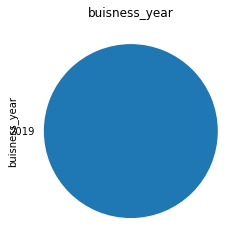

In [123]:
#Previously, we observed
fig = X_train['buisness_year'].value_counts().plot.pie()
fig.set_title('buisness_year')

#Observation
#business_year is a constant column for training data thus, it can be dropped

In [124]:
X_train.drop(['buisness_year'],axis=1,inplace=True)

#Repeating the same for Val and test
X_val.drop(['buisness_year'],axis=1,inplace=True)
X_test.drop(['buisness_year'],axis=1,inplace=True)

In [125]:
#Correlation plot

corr = X_train.corr()

In [126]:
X_train.shape, X_val.shape, X_test.shape

((28985, 22), (3827, 22), (3828, 22))

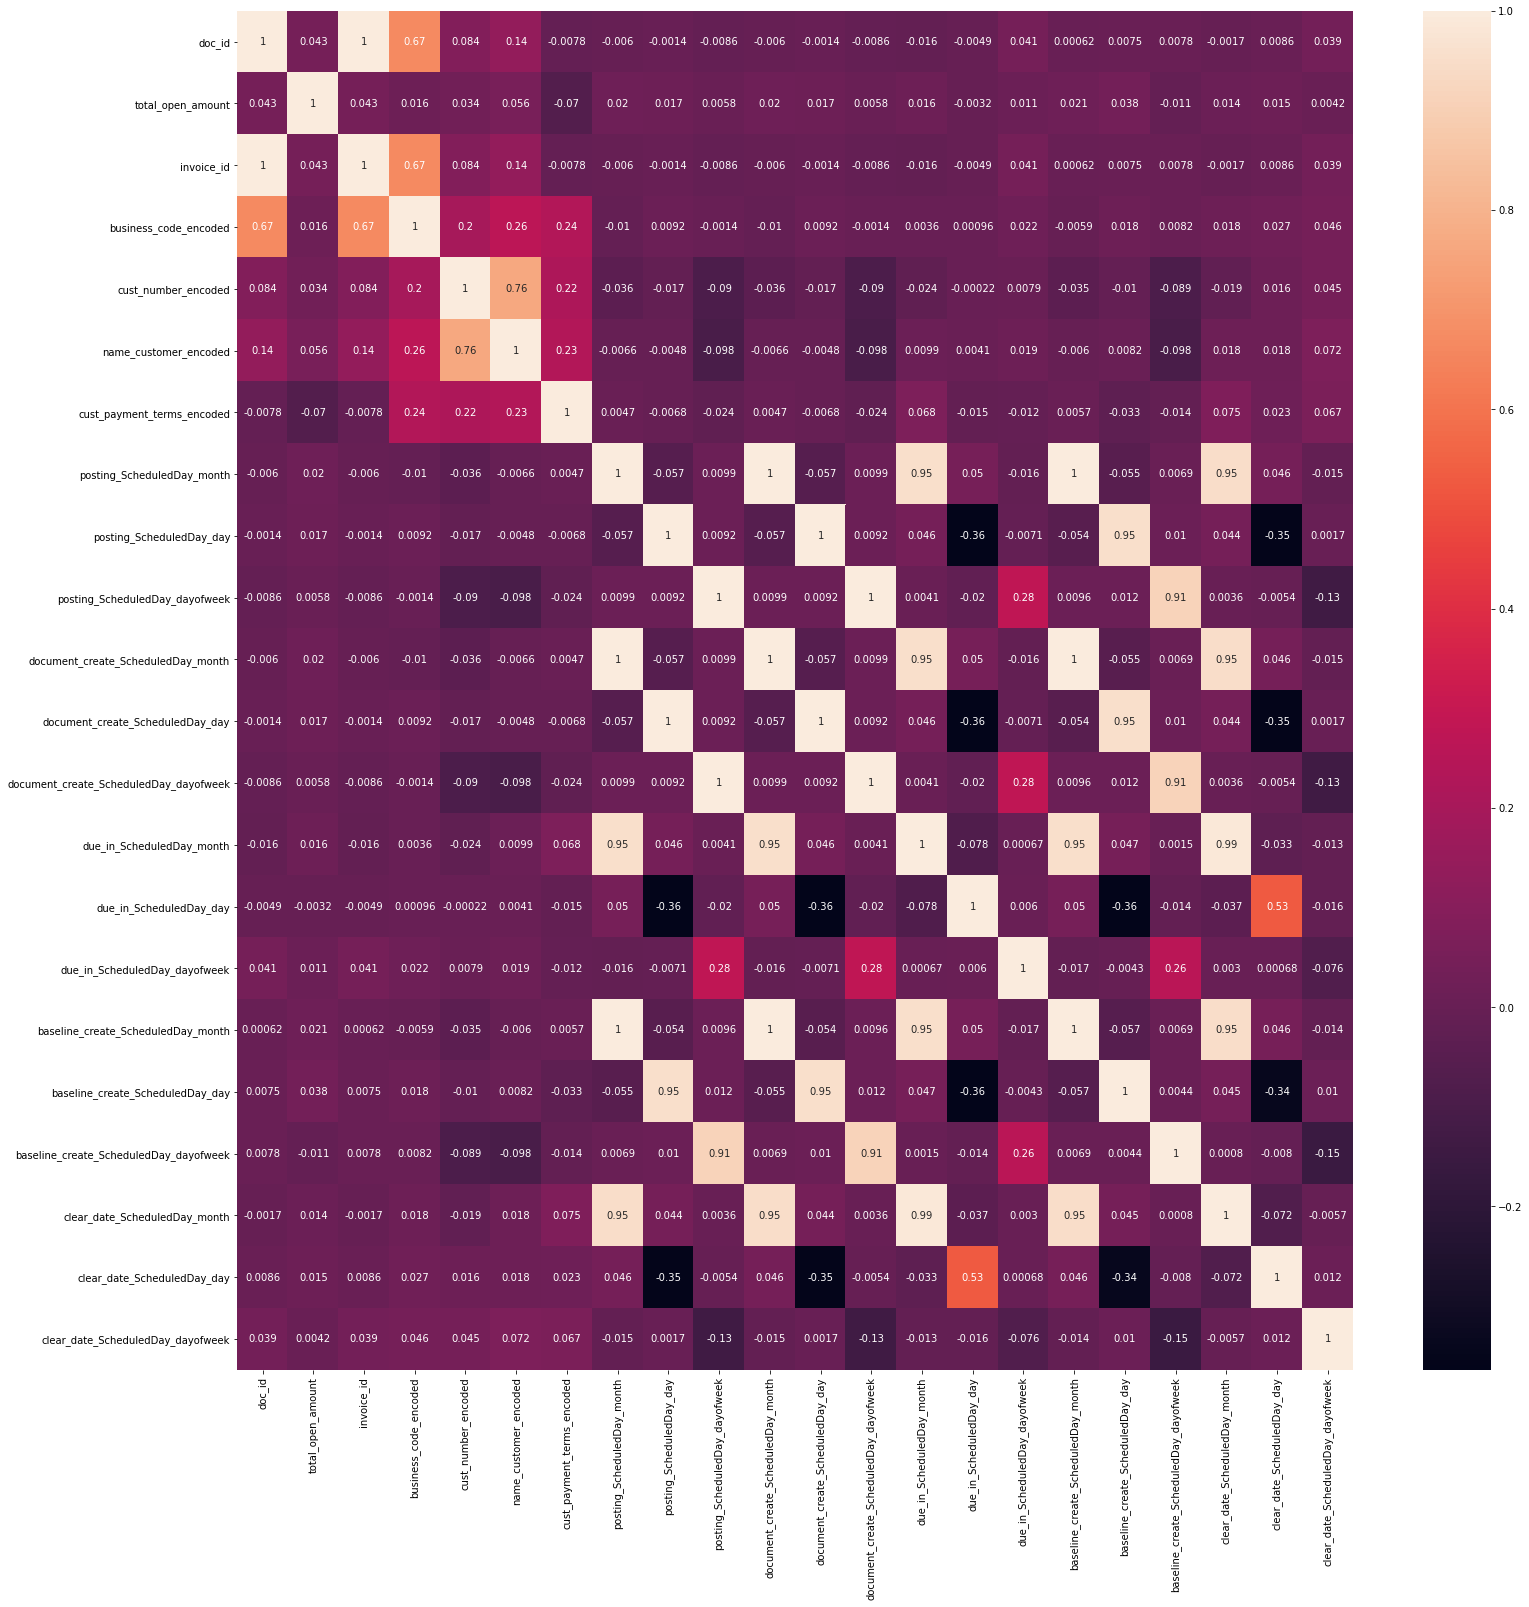

In [127]:
plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True)

In [128]:
#Observation,
#Many features have high corr, signaling they are higly correlated
#thus one of them can be considered and the other can be dropped

In [129]:
from sklearn.feature_selection import VarianceThreshold

In [130]:
#filtering all the columns with zero variance
constant_filter = VarianceThreshold(threshold=0)

constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()]) #Number of non-constant features

22

In [131]:
constant_columns = [column for column in X_train if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


In [132]:
constant_columns

[]

In [133]:
#Dropping_Duplicated Columns
X_train_1 = X_train.T
print(X_train_1.duplicated().sum())

4


In [134]:
# select the duplicated features columns names
duplicated_columns = X_train_1[X_train_1.duplicated()].index.values

In [135]:
duplicated_columns

array(['invoice_id', 'document_create_ScheduledDay_month',
       'document_create_ScheduledDay_day',
       'document_create_ScheduledDay_dayofweek'], dtype=object)

In [136]:
X_train.columns

Index(['doc_id', 'total_open_amount', 'invoice_id', 'business_code_encoded',
       'cust_number_encoded', 'name_customer_encoded',
       'cust_payment_terms_encoded', 'posting_ScheduledDay_month',
       'posting_ScheduledDay_day', 'posting_ScheduledDay_dayofweek',
       'document_create_ScheduledDay_month',
       'document_create_ScheduledDay_day',
       'document_create_ScheduledDay_dayofweek', 'due_in_ScheduledDay_month',
       'due_in_ScheduledDay_day', 'due_in_ScheduledDay_dayofweek',
       'baseline_create_ScheduledDay_month',
       'baseline_create_ScheduledDay_day',
       'baseline_create_ScheduledDay_dayofweek',
       'clear_date_ScheduledDay_month', 'clear_date_ScheduledDay_day',
       'clear_date_ScheduledDay_dayofweek'],
      dtype='object')

In [137]:
#So we found, 4 duplicated columns after Feature Engineering, and one constant column which are to be dropped

In [138]:
X_train.drop(['invoice_id','document_create_ScheduledDay_month','document_create_ScheduledDay_day','document_create_ScheduledDay_dayofweek'],axis=1,inplace=True)

#Repeating the same for Val and Test

X_val.drop(['invoice_id','document_create_ScheduledDay_month','document_create_ScheduledDay_day','document_create_ScheduledDay_dayofweek'],axis=1,inplace=True)
X_test.drop(['invoice_id','document_create_ScheduledDay_month','document_create_ScheduledDay_day','document_create_ScheduledDay_dayofweek'],axis=1,inplace=True)


In [139]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28985 entries, 0 to 30615
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   doc_id                                  28985 non-null  float64
 1   total_open_amount                       28985 non-null  float64
 2   business_code_encoded                   28985 non-null  float64
 3   cust_number_encoded                     28985 non-null  float64
 4   name_customer_encoded                   28985 non-null  float64
 5   cust_payment_terms_encoded              28985 non-null  float64
 6   posting_ScheduledDay_month              28985 non-null  int64  
 7   posting_ScheduledDay_day                28985 non-null  int64  
 8   posting_ScheduledDay_dayofweek          28985 non-null  int64  
 9   due_in_ScheduledDay_month               28985 non-null  int64  
 10  due_in_ScheduledDay_day                 28985 non-null  in

In [140]:
X_train

,doc_id,total_open_amount,business_code_encoded,cust_number_encoded,name_customer_encoded,cust_payment_terms_encoded,posting_ScheduledDay_month,posting_ScheduledDay_day,posting_ScheduledDay_dayofweek,due_in_ScheduledDay_month,due_in_ScheduledDay_day,due_in_ScheduledDay_dayofweek,baseline_create_ScheduledDay_month,baseline_create_ScheduledDay_day,baseline_create_ScheduledDay_dayofweek,clear_date_ScheduledDay_month,clear_date_ScheduledDay_day,clear_date_ScheduledDay_dayofweek
0,2.960528e+09,8558.3304,1.0,96.0,643.0,2.0,2,12,1,10,27,5,10,17,2,2,15,4
1,1.929921e+09,26.2800,0.0,273.0,1188.0,39.0,9,25,2,12,31,0,12,16,6,9,25,2
2,2.960522e+09,1886.6520,1.0,19.0,252.0,2.0,1,11,4,1,6,6,12,27,3,2,20,2
3,1.928542e+09,152.7900,0.0,1.0,24.0,0.0,12,30,6,1,14,0,12,30,6,1,15,1
4,1.928541e+09,22237.9800,0.0,0.0,6.0,1.0,12,30,6,1,14,0,12,30,6,1,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30609,1.930159e+09,28778.7500,0.0,423.0,2925.0,13.0,11,18,0,11,28,3,11,18,0,12,3,1
30610,1.930165e+09,68535.9400,0.0,2.0,36.0,3.0,11,18,0,12,3,1,11,18,0,12,3,1
30611,1.930165e+09,41176.5000,0.0,46.0,241.0,10.0,11,18,0,12,20,4,11,18,0,12,23,0
30612,1.930163e+09,56364.0000,0.0,53.0,516.0,0.0,11,18,0,12,3,1,11,18,0,12,3,1


In [141]:
X_train.shape, X_val.shape, X_test.shape

((28985, 18), (3827, 18), (3828, 18))

In [142]:
X_train.drop(['doc_id'],axis=1,inplace=True)
X_val.drop(['doc_id'],axis=1,inplace=True)
X_test.drop(['doc_id'],axis=1,inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28985 entries, 0 to 30615
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   total_open_amount                       28985 non-null  float64
 1   business_code_encoded                   28985 non-null  float64
 2   cust_number_encoded                     28985 non-null  float64
 3   name_customer_encoded                   28985 non-null  float64
 4   cust_payment_terms_encoded              28985 non-null  float64
 5   posting_ScheduledDay_month              28985 non-null  int64  
 6   posting_ScheduledDay_day                28985 non-null  int64  
 7   posting_ScheduledDay_dayofweek          28985 non-null  int64  
 8   due_in_ScheduledDay_month               28985 non-null  int64  
 9   due_in_ScheduledDay_day                 28985 non-null  int64  
 10  due_in_ScheduledDay_dayofweek           28985 non-null  in

In [143]:
X_train.drop(['clear_date_ScheduledDay_month','clear_date_ScheduledDay_day','clear_date_ScheduledDay_dayofweek'],axis=1,inplace=True)
X_val.drop(['clear_date_ScheduledDay_month','clear_date_ScheduledDay_day','clear_date_ScheduledDay_dayofweek'],axis=1,inplace=True)
X_test.drop(['clear_date_ScheduledDay_month','clear_date_ScheduledDay_day','clear_date_ScheduledDay_dayofweek'],axis=1,inplace=True)

X_train.drop(['posting_ScheduledDay_month','baseline_create_ScheduledDay_day','baseline_create_ScheduledDay_dayofweek','baseline_create_ScheduledDay_month'],axis=1,inplace=True)
X_val.drop(['posting_ScheduledDay_month','baseline_create_ScheduledDay_day','baseline_create_ScheduledDay_dayofweek','baseline_create_ScheduledDay_month'],axis=1,inplace=True)
X_test.drop(['posting_ScheduledDay_month','baseline_create_ScheduledDay_day','baseline_create_ScheduledDay_dayofweek','baseline_create_ScheduledDay_month'],axis=1,inplace=True)


In [144]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28985 entries, 0 to 30615
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   total_open_amount               28985 non-null  float64
 1   business_code_encoded           28985 non-null  float64
 2   cust_number_encoded             28985 non-null  float64
 3   name_customer_encoded           28985 non-null  float64
 4   cust_payment_terms_encoded      28985 non-null  float64
 5   posting_ScheduledDay_day        28985 non-null  int64  
 6   posting_ScheduledDay_dayofweek  28985 non-null  int64  
 7   due_in_ScheduledDay_month       28985 non-null  int64  
 8   due_in_ScheduledDay_day         28985 non-null  int64  
 9   due_in_ScheduledDay_dayofweek   28985 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 3.4 MB


In [145]:
X_train.drop(['name_customer_encoded'],axis=1,inplace=True)
X_val.drop(['name_customer_encoded'],axis=1,inplace=True)
X_test.drop(['name_customer_encoded'],axis=1,inplace=True)

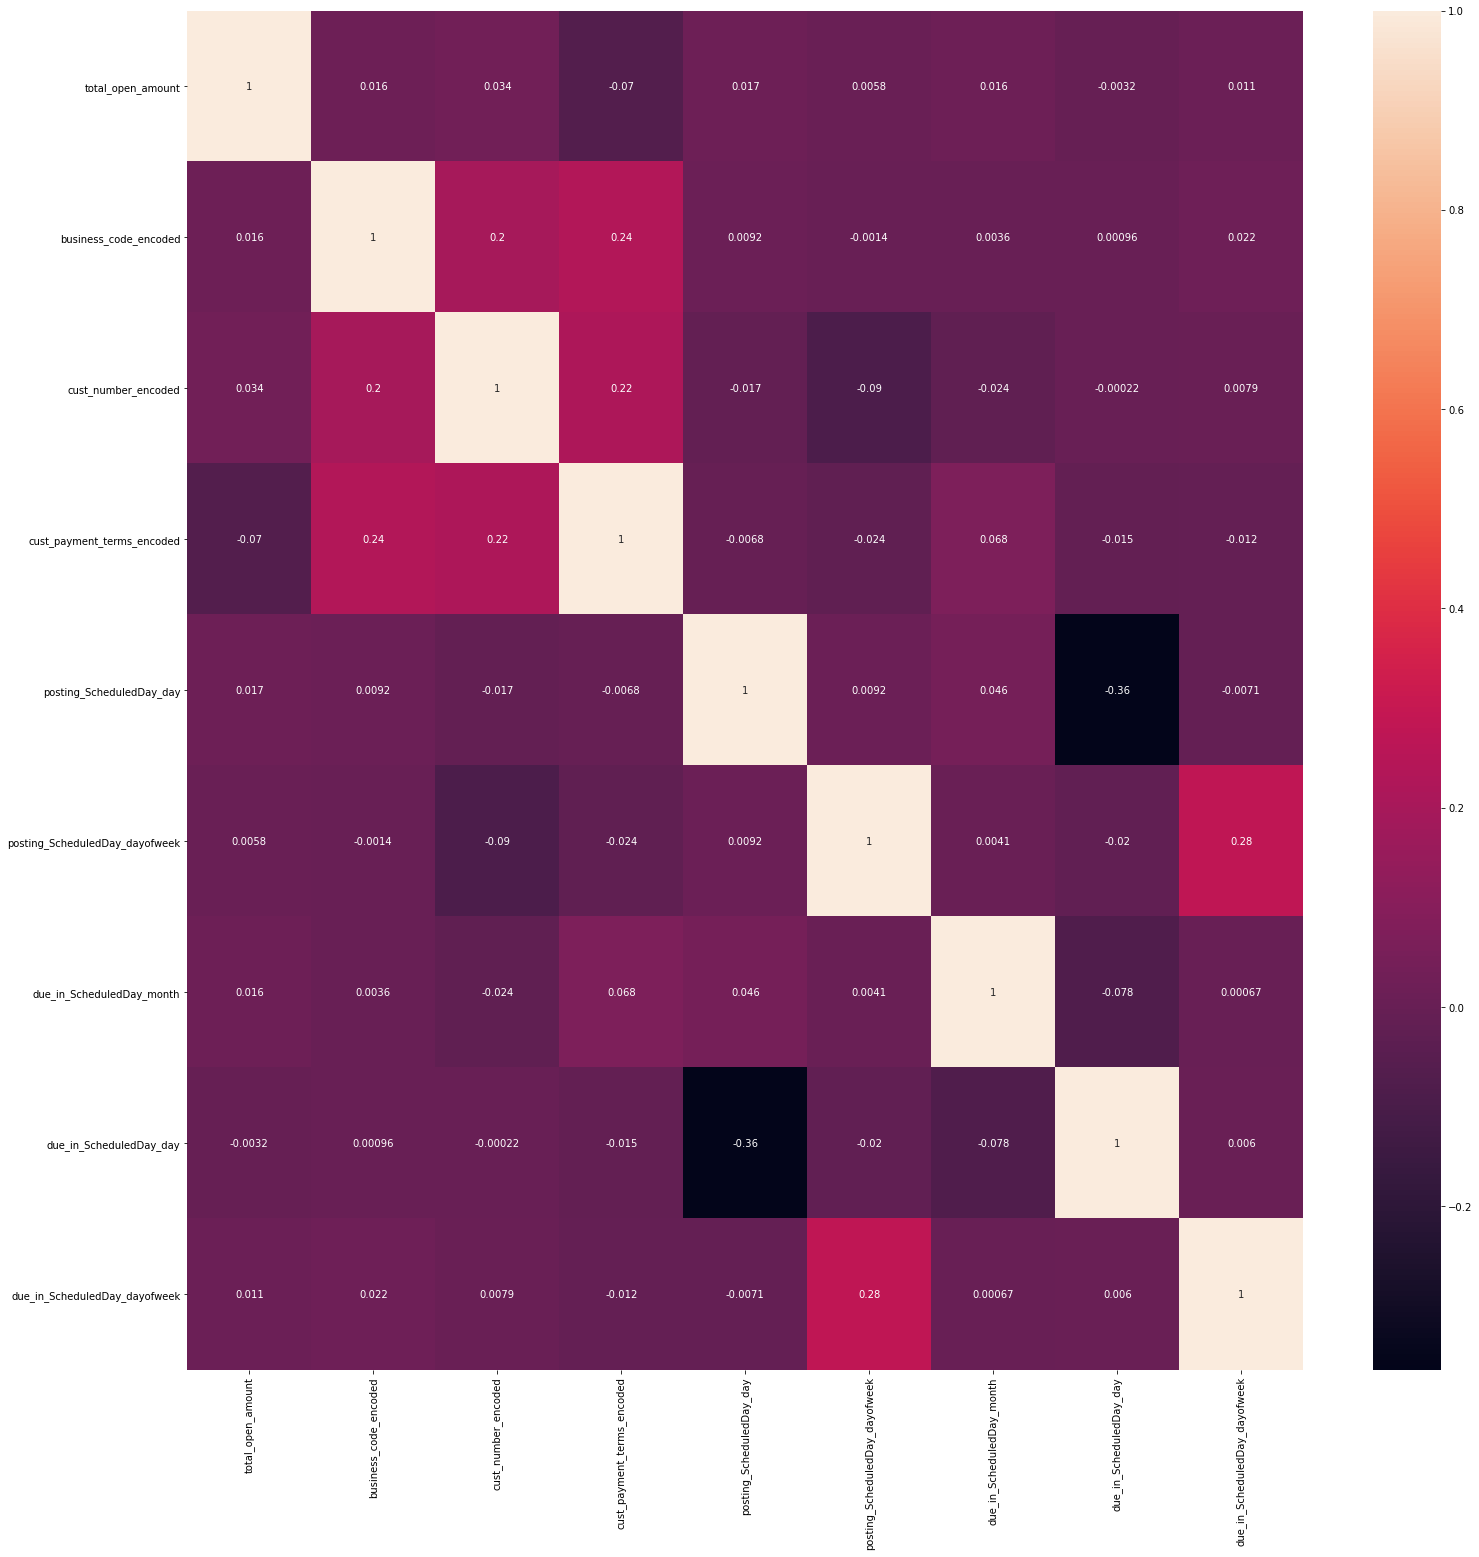

In [146]:
corrr = X_train.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corrr,annot=True)

In [147]:
X_train.shape, X_val.shape, X_test.shape

((28985, 9), (3827, 9), (3828, 9))

In [148]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)   #fit_transform as it will learn the behaviour of the data
X_test = ss.transform(X_test) 
X_val = ss.transform(X_val) 

## <u>Model-building 

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [150]:
MSE_Score = []
R2_Score = []
Algorithm = []
score = []

### <u>Linear Regression

In [151]:
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_val)

print(mean_squared_error(y_val, predicted))
print(r2_score(y_val, predicted))

MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))


63.70279105964497
-0.0034394452333292858


In [152]:
y_val

30617    0.0
30618   -4.0
30619    0.0
30620   -1.0
30621    0.0
        ... 
34439   -3.0
34440    0.0
34441    6.0
34442    0.0
34443    0.0
Name: delay, Length: 3827, dtype: float64

In [153]:
predicted

array([ 0.02692481, -0.63781328, -0.49145324, ...,  0.34115201,
        0.84601697,  0.7453907 ])

### <u>SVM

In [154]:
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_val)

print(mean_squared_error(y_val, predicted))
print(r2_score(y_val, predicted))

MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))


57.51113699633024
0.09409081702083222


In [155]:
y_val

30617    0.0
30618   -4.0
30619    0.0
30620   -1.0
30621    0.0
        ... 
34439   -3.0
34440    0.0
34441    6.0
34442    0.0
34443    0.0
Name: delay, Length: 3827, dtype: float64

In [156]:
predicted

array([ 0.43984527, -0.11059946,  0.17848823, ..., -0.13016637,
       -0.73467601,  0.01303731])

### <u>Decision Tree Regressor

In [157]:
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor(random_state=0 , max_depth=5)
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_val)

print(mean_squared_error(y_val, predicted))
print(r2_score(y_val, predicted))

MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))


43.796482936548216
0.31012255805443134


In [158]:
y_val

30617    0.0
30618   -4.0
30619    0.0
30620   -1.0
30621    0.0
        ... 
34439   -3.0
34440    0.0
34441    6.0
34442    0.0
34443    0.0
Name: delay, Length: 3827, dtype: float64

In [159]:
predicted

array([-1.63070539, -1.63070539,  1.03988685, ...,  1.03988685,
       -1.63070539,  0.80424301])

### <u>Random Forest Regressor

In [160]:
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_val)

print(mean_squared_error(y_val, predicted))
print(r2_score(y_val, predicted))

MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))


46.7412009983202
0.26373767900719436


In [161]:
y_val

30617    0.0
30618   -4.0
30619    0.0
30620   -1.0
30621    0.0
        ... 
34439   -3.0
34440    0.0
34441    6.0
34442    0.0
34443    0.0
Name: delay, Length: 3827, dtype: float64

In [162]:
predicted

array([-0.01, -2.09,  2.63, ..., -1.98, -0.6 ,  0.05])

### <u>XG Boost Regressor 

In [163]:
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_val)

print(mean_squared_error(y_val, predicted))
print(r2_score(y_val, predicted))

MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))


48.907136135494866
0.2296201039950888


In [164]:
y_val

30617    0.0
30618   -4.0
30619    0.0
30620   -1.0
30621    0.0
        ... 
34439   -3.0
34440    0.0
34441    6.0
34442    0.0
34443    0.0
Name: delay, Length: 3827, dtype: float64

In [165]:
predicted

array([-1.0565249 , -4.253748  ,  0.7012513 , ..., -0.1365089 ,
       -0.5036806 ,  0.51884514], dtype=float32)

In [166]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])
Comparison

,Algorithm,MSE_Score,R2_Score
0,Linear Regression,63.702791,-0.003439
1,Support Vector Regression,57.511137,0.094091
2,Decision Tree Regressor,43.796483,0.310123
3,Random Forest Regressor,46.741201,0.263738
4,XGB Regressor,48.907136,0.229620


## Thus, <u>Decision Tree Regressor performs the best on comparing the R-2 Score 

### Testing for Overfit in Testing-set -

In [167]:
clf = DecisionTreeRegressor(random_state=0 , max_depth=5)
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)

print('Test MSE:',mean_squared_error(y_test, predicted))
print('Test R-2 Score',r2_score(y_test, predicted))

Test MSE: 62.62307139745511
Test R-2 Score 0.43146685719298317


## <u>Testing to predict the delay of unseen open Invoices -

In [168]:
df_test = df_null.copy()

df_null = df_null.sort_values('baseline_create_date')
df_null.reset_index(inplace = True)
df_null.drop(['index'],axis=1,inplace=True)

In [169]:
df_null.drop(['clear_date','delay'],axis=1,inplace=True)

In [170]:
df_null

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200754118,ARMY associates,2020,1.930600e+09,2020-03-04,2020-03-04,2020-03-04,2020-02-16,USD,RV,1.0,100.92,2020-02-01,NAM3,1.930600e+09,1
1,U001,0100036278,WOEBER M co,2020,1.930593e+09,2020-03-03,2020-03-03,2020-03-03,2020-02-19,USD,RV,1.0,7581.66,2020-02-04,NAA8,1.930593e+09,1
2,U001,0200794332,COST co,2020,1.930576e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,32715.47,2020-02-27,NAAX,1.930576e+09,1
3,U001,0200149567,RESER llc,2020,1.930579e+09,2020-02-27,2020-02-27,2020-02-27,2020-04-12,USD,RV,1.0,73316.88,2020-02-27,NABG,1.930579e+09,1
4,U001,0200777735,NASH llc,2020,1.930570e+09,2020-02-27,2020-02-25,2020-02-27,2020-03-13,USD,RV,1.0,22627.33,2020-02-27,NAA8,1.930570e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9367,CA02,0100027744,OMEGA AD corp,2020,2.960634e+09,2020-05-16,2020-05-16,2020-05-16,2020-05-16,CAD,RV,1.0,20550.40,2020-05-16,CAB1,2.960634e+09,1
9368,CA02,0140104229,A & W F,2020,2.960633e+09,2020-05-08,2020-05-08,2020-05-08,2020-05-26,CAD,RV,1.0,410.04,2020-05-16,CA10,2.960633e+09,1
9369,CA02,0140105785,SHOPPE,2020,2.960636e+09,2020-05-19,2020-05-19,2020-05-19,2020-05-29,CAD,RV,1.0,935.09,2020-05-19,CA10,2.960636e+09,1
9370,U001,0100026809,PRES trust,2020,1.930917e+09,2020-05-19,2020-05-19,2020-05-19,2020-05-29,USD,RV,1.0,201.25,2020-05-19,NA10,1.930917e+09,1


### <u>*</u> Transforming the Training features to the dataset before making the prediction -

In [171]:
print('''Training_Feature_set\n
total_open_amount               30617 non-null  float64
business_code_encoded           30617 non-null  float64
cust_number_encoded             30617 non-null  float64
cust_payment_terms_encoded      30617 non-null  float64
posting_ScheduledDay_day        30617 non-null  int64  
posting_ScheduledDay_dayofweek  30617 non-null  int64  
due_in_ScheduledDay_month       30617 non-null  int64  
due_in_ScheduledDay_day         30617 non-null  int64  
due_in_ScheduledDay_dayofweek   30617 non-null  int64''')

Training_Feature_set

total_open_amount               30617 non-null  float64
business_code_encoded           30617 non-null  float64
cust_number_encoded             30617 non-null  float64
cust_payment_terms_encoded      30617 non-null  float64
posting_ScheduledDay_day        30617 non-null  int64  
posting_ScheduledDay_dayofweek  30617 non-null  int64  
due_in_ScheduledDay_month       30617 non-null  int64  
due_in_ScheduledDay_day         30617 non-null  int64  
due_in_ScheduledDay_dayofweek   30617 non-null  int64


In [172]:
df_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9372 entries, 0 to 9371
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           9372 non-null   object        
 1   cust_number             9372 non-null   object        
 2   name_customer           9372 non-null   object        
 3   buisness_year           9372 non-null   int32         
 4   doc_id                  9372 non-null   float64       
 5   posting_date            9372 non-null   datetime64[ns]
 6   document_create_date    9372 non-null   datetime64[ns]
 7   document_create_date.1  9372 non-null   datetime64[ns]
 8   due_in_date             9372 non-null   datetime64[ns]
 9   invoice_currency        9372 non-null   object        
 10  document type           9372 non-null   object        
 11  posting_id              9372 non-null   float64       
 12  total_open_amount       9372 non-null   float64 

In [173]:
df_null.drop(['buisness_year','doc_id','document_create_date','document_create_date.1','document type','posting_id','baseline_create_date','invoice_id','isOpen'],axis=1,inplace=True)

In [174]:
df_null

,business_code,cust_number,name_customer,posting_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
0,U001,0200754118,ARMY associates,2020-03-04,2020-02-16,USD,100.92,NAM3
1,U001,0100036278,WOEBER M co,2020-03-03,2020-02-19,USD,7581.66,NAA8
2,U001,0200794332,COST co,2020-02-27,2020-03-13,USD,32715.47,NAAX
3,U001,0200149567,RESER llc,2020-02-27,2020-04-12,USD,73316.88,NABG
4,U001,0200777735,NASH llc,2020-02-27,2020-03-13,USD,22627.33,NAA8
...,...,...,...,...,...,...,...,...
9367,CA02,0100027744,OMEGA AD corp,2020-05-16,2020-05-16,CAD,20550.40,CAB1
9368,CA02,0140104229,A & W F,2020-05-08,2020-05-26,CAD,410.04,CA10
9369,CA02,0140105785,SHOPPE,2020-05-19,2020-05-29,CAD,935.09,CA10
9370,U001,0100026809,PRES trust,2020-05-19,2020-05-29,USD,201.25,NA10


In [175]:
#Converting CAD to USD (1 CAD = 0.81 USD) for data uniformity and dropping the 'invoice_currency'

Test_CAD_index = []
for i in range(0,len(df_null)):
    if df_null['invoice_currency'][i] == 'CAD':
        Test_CAD_index.append(i)
for j in Test_CAD_index:
    df_null['total_open_amount'][j] = df_null['total_open_amount'][j]*0.81
    
df_null.drop(['invoice_currency'],axis=1,inplace=True)

In [176]:
df_null.drop(['name_customer'],axis=1,inplace=True)

In [177]:
df_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9372 entries, 0 to 9371
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   business_code       9372 non-null   object        
 1   cust_number         9372 non-null   object        
 2   posting_date        9372 non-null   datetime64[ns]
 3   due_in_date         9372 non-null   datetime64[ns]
 4   total_open_amount   9372 non-null   float64       
 5   cust_payment_terms  9372 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 439.4+ KB


In [178]:
df_null['business_code_encoded'] = ordin.transform(df_null['business_code'].values.reshape(-1,1))
df_null.drop(['business_code'],axis=1,inplace=True)

In [179]:
df_null['cust_number_encoded'] = ordin1.transform(df_null['cust_number'].values.reshape(-1,1))
df_null.drop(['cust_number'],axis=1,inplace=True)

In [180]:
df_null['cust_payment_terms_encoded'] = ordin3.transform(df_null['cust_payment_terms'].values.reshape(-1,1))
df_null.drop(['cust_payment_terms'],axis=1,inplace=True)

In [181]:
df_null['posting_ScheduledDay_day'] = df_null['posting_date'].dt.day
df_null['posting_ScheduledDay_dayofweek'] = df_null['posting_date'].dt.dayofweek

df_null['due_in_ScheduledDay_month'] = df_null['due_in_date'].dt.month
df_null['due_in_ScheduledDay_day'] = df_null['due_in_date'].dt.day
df_null['due_in_ScheduledDay_dayofweek'] = df_null['due_in_date'].dt.dayofweek

df_null.drop(['posting_date','due_in_date'],axis=1,inplace=True)

In [182]:
df_null.dtypes

total_open_amount                 float64
business_code_encoded             float64
cust_number_encoded               float64
cust_payment_terms_encoded        float64
posting_ScheduledDay_day            int64
posting_ScheduledDay_dayofweek      int64
due_in_ScheduledDay_month           int64
due_in_ScheduledDay_day             int64
due_in_ScheduledDay_dayofweek       int64
dtype: object

In [183]:
df_null = ss.transform(df_null) #Transforming the standard_scaled behaviour of the trained data here.

## <u> Final Prediction 

In [184]:
final_out = clf.predict(df_null)

In [185]:
final_out = pd.Series(final_out,name='Delay')

In [186]:
final_out

0       0.561446
1       2.196869
2      -1.630705
3       0.561446
4       1.039887
          ...   
9367    0.561446
9368    4.928068
9369    9.108108
9370    2.466737
9371    1.039887
Name: Delay, Length: 9372, dtype: float64

In [187]:
df_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
5,U001,0200769623,WAL-MAR in,NaT,2020,1.930800e+09,2020-04-18,2020-04-18,2020-04-18,2020-05-03,USD,RV,1.0,37113.61,2020-04-18,NAH4,1.930800e+09,1,NaN
6,U001,0200769623,WAL-MAR,NaT,2020,1.930752e+09,2020-04-07,2020-04-06,2020-04-07,2020-04-22,USD,RV,1.0,3975.96,2020-04-07,NAH4,1.930752e+09,1,NaN
17,U001,0200759878,SA corp,NaT,2020,1.930848e+09,2020-05-03,2020-05-02,2020-05-03,2020-05-18,USD,RV,1.0,36682.71,2020-05-03,NAH4,1.930848e+09,1,NaN
31,U001,0200712187,SPAR foundation,NaT,2020,1.930875e+09,2020-05-07,2020-05-07,2020-05-07,2020-05-22,USD,RV,1.0,50396.12,2020-05-07,NAA8,1.930875e+09,1,NaN
36,U001,0200744019,TARG,NaT,2020,1.930822e+09,2020-04-25,2020-04-24,2020-04-25,2020-05-10,USD,RV,1.0,17986.66,2020-04-25,NAA8,1.930822e+09,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49944,U001,0200759878,SA us,NaT,2020,1.930690e+09,2020-03-26,2020-03-23,2020-03-26,2020-04-10,USD,RV,1.0,29634.17,2020-03-26,NAH4,1.930690e+09,1,NaN
49945,U001,0200769623,WAL-MAR us,NaT,2020,1.930753e+09,2020-04-07,2020-04-06,2020-04-07,2020-04-22,USD,RV,1.0,24147.92,2020-04-07,NAH4,1.930753e+09,1,NaN
49949,U001,0200749782,KROG corporation,NaT,2020,1.930828e+09,2020-04-27,2020-04-25,2020-04-27,2020-05-12,USD,RV,1.0,14200.49,2020-04-27,NAA8,1.930828e+09,1,NaN
49960,U001,0200772670,ASSOCIAT foundation,NaT,2020,1.930768e+09,2020-04-08,2020-04-08,2020-04-08,2020-04-23,USD,RV,1.0,2643.14,2020-04-08,NAU5,1.930768e+09,1,NaN


In [188]:
df_test.drop(['clear_date','delay'],axis=1,inplace=True)
Final_Pred = df_test.merge(final_out , on=df_test.index )

In [189]:
Final_Pred.drop(['key_0'],axis=1,inplace=True)

In [190]:
Final_Pred['Delay'] = Final_Pred['Delay'].round()

In [191]:
Final_Pred['clear_date_pred'] = Final_Pred['due_in_date'] + pd.to_timedelta(Final_Pred['Delay'], unit='d')

In [192]:
Delay_list = list(Final_Pred['Delay'])

In [193]:
age_bckt_list = []
range_0 = range(-1000,0)
range_1 = range(0,16)
range_2 = range(16,31)
range_3 = range(31,46)
range_4 = range(46,61)
range_5 = range(61,500)

for i in Delay_list:
    if i in range_0:
        age_bckt_list.append('< 0 days')
    elif i in range_1:
        age_bckt_list.append('0-15 days')
    elif i in range_2:
        age_bckt_list.append('16-30 days')
    elif i in range_3:
        age_bckt_list.append('31-45 days')
    elif i in range_4:
        age_bckt_list.append('46-60 days')
    elif i in range_5:
        age_bckt_list.append('Greater than 60 days') 

In [194]:
Final_Pred['Aging_Bucket'] = age_bckt_list

In [195]:
Final_Pred['Delay'] = Final_Pred['Delay'].astype('int')
Final_Pred

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay,clear_date_pred,Aging_Bucket
0,U001,0200769623,WAL-MAR in,2020,1.930800e+09,2020-04-18,2020-04-18,2020-04-18,2020-05-03,USD,RV,1.0,37113.61,2020-04-18,NAH4,1.930800e+09,1,1,2020-05-04,0-15 days
1,U001,0200769623,WAL-MAR,2020,1.930752e+09,2020-04-07,2020-04-06,2020-04-07,2020-04-22,USD,RV,1.0,3975.96,2020-04-07,NAH4,1.930752e+09,1,2,2020-04-24,0-15 days
2,U001,0200759878,SA corp,2020,1.930848e+09,2020-05-03,2020-05-02,2020-05-03,2020-05-18,USD,RV,1.0,36682.71,2020-05-03,NAH4,1.930848e+09,1,-2,2020-05-16,< 0 days
3,U001,0200712187,SPAR foundation,2020,1.930875e+09,2020-05-07,2020-05-07,2020-05-07,2020-05-22,USD,RV,1.0,50396.12,2020-05-07,NAA8,1.930875e+09,1,1,2020-05-23,0-15 days
4,U001,0200744019,TARG,2020,1.930822e+09,2020-04-25,2020-04-24,2020-04-25,2020-05-10,USD,RV,1.0,17986.66,2020-04-25,NAA8,1.930822e+09,1,1,2020-05-11,0-15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9367,U001,0200759878,SA us,2020,1.930690e+09,2020-03-26,2020-03-23,2020-03-26,2020-04-10,USD,RV,1.0,29634.17,2020-03-26,NAH4,1.930690e+09,1,1,2020-04-11,0-15 days
9368,U001,0200769623,WAL-MAR us,2020,1.930753e+09,2020-04-07,2020-04-06,2020-04-07,2020-04-22,USD,RV,1.0,24147.92,2020-04-07,NAH4,1.930753e+09,1,5,2020-04-27,0-15 days
9369,U001,0200749782,KROG corporation,2020,1.930828e+09,2020-04-27,2020-04-25,2020-04-27,2020-05-12,USD,RV,1.0,14200.49,2020-04-27,NAA8,1.930828e+09,1,9,2020-05-21,0-15 days
9370,U001,0200772670,ASSOCIAT foundation,2020,1.930768e+09,2020-04-08,2020-04-08,2020-04-08,2020-04-23,USD,RV,1.0,2643.14,2020-04-08,NAU5,1.930768e+09,1,2,2020-04-25,0-15 days


In [196]:
Final_Pred['Aging_Bucket'].value_counts()

0-15 days               4844
< 0 days                4462
31-45 days                32
46-60 days                29
Greater than 60 days       3
16-30 days                 2
Name: Aging_Bucket, dtype: int64